# **WebScrapping**

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [ ]:
page = requests.get(url)

In [ ]:
soup = BeautifulSoup(page.text, 'html')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientp

In [ ]:
table = soup.find_all('table')[0]

In [ ]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [ ]:
titles = table.find_all('th')

In [ ]:
headers = [titles.text.strip() for titles in titles]
headers

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [ ]:
column_data = table.find_all('tr')
column_data

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">648,125
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
 </td>
 <td style="text-align:center;">2,100,000
 </td>
 <td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">

In [ ]:
for row in column_data:
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data ]
  print(individual_row_data)

[]
['1', 'Walmart', 'Retail', '648,125', '6.0%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '574,785', '11.9%', '1,525,000', 'Seattle, Washington']
['3', 'Apple', 'Electronics industry', '383,482', '-2.8%', '161,000', 'Cupertino, California']
['4', 'UnitedHealth Group', 'Healthcare', '371,622', '14.6%', '440,000', 'Minnetonka, Minnesota']
['5', 'Berkshire Hathaway', 'Conglomerate', '364,482', '20.7%', '396,500', 'Omaha, Nebraska']
['6', 'CVS Health', 'Healthcare', '357,776', '10.9%', '259,500', 'Woonsocket, Rhode Island']
['7', 'ExxonMobil', 'Petroleum industry', '344,582', '-16.7%', '61,500', 'Spring, Texas']
['8', 'Alphabet', 'Technology and cloud computing', '307,394', '8.7%', '182,502', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,000', 'Irving, Texas']
['10', 'Cencora', 'Pharmacy wholesale', '262,173', '9.9%', '44,000', 'Conshohocken, Pennsylvania']
['11', 'Costco', 'Retail', '242,290', '6.8%',

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=headers)

In [ ]:
df

Empty DataFrame
Columns: [Rank, Name, Industry, Revenue (USD millions), Revenue growth, Employees, Headquarters]
Index: []

In [ ]:
for row in column_data[1:]:
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data ]

  length = len(df)
  df.loc[length] = individual_row_data

In [ ]:
df

Rank                  Name                    Industry  \
0     1               Walmart                      Retail   
1     2                Amazon  Retail and cloud computing   
2     3                 Apple        Electronics industry   
3     4    UnitedHealth Group                  Healthcare   
4     5    Berkshire Hathaway                Conglomerate   
..  ...                   ...                         ...   
95   96                  TIAA                  Financials   
96   97                   CHS     Agriculture cooperative   
97   98  Bristol-Myers Squibb     Pharmaceutical industry   
98   99  Dow Chemical Company           Chemical industry   
99  100              Best Buy                      Retail   

   Revenue (USD millions) Revenue growth  Employees  \
0                 648,125           6.0%  2,100,000   
1                 574,785          11.9%  1,525,000   
2                 383,482          -2.8%    161,000   
3                 371,622          14.6%    440,000   
4                 364,482          20.7%    396,500   
..                    ...            ...        ...   
95                 45,735          11.8%     16,023   
96                 45,590          -4.6%     10,609   
97                 45,006          -2.5%     34,100   
98                 44,622         -21.6%     35,900   
99                 43,452          -6.1%     85,000   

                      Headquarters  
0            Bentonville, Arkansas  
1              Seattle, Washington  
2            Cupertino, California  
3            Minnetonka, Minnesota  
4                  Omaha, Nebraska  
..                             ...  
95         New York City, New York  
96  Inver Grove Heights, Minnesota  
97         New York City, New York  
98               Midland, Michigan  
99            Richfield, Minnesota  

[100 rows x 7 columns]

In [ ]:
# make the Rank column index
df.set_index('Rank', inplace=True)

In [ ]:
df

Name                    Industry Revenue (USD millions)  \
Rank                                                                            
1                  Walmart                      Retail                648,125   
2                   Amazon  Retail and cloud computing                574,785   
3                    Apple        Electronics industry                383,482   
4       UnitedHealth Group                  Healthcare                371,622   
5       Berkshire Hathaway                Conglomerate                364,482   
...                    ...                         ...                    ...   
96                    TIAA                  Financials                 45,735   
97                     CHS     Agriculture cooperative                 45,590   
98    Bristol-Myers Squibb     Pharmaceutical industry                 45,006   
99    Dow Chemical Company           Chemical industry                 44,622   
100               Best Buy                      Retail                 43,452   

     Revenue growth  Employees                    Headquarters  
Rank                                                            
1              6.0%  2,100,000           Bentonville, Arkansas  
2             11.9%  1,525,000             Seattle, Washington  
3             -2.8%    161,000           Cupertino, California  
4             14.6%    440,000           Minnetonka, Minnesota  
5             20.7%    396,500                 Omaha, Nebraska  
...             ...        ...                             ...  
96            11.8%     16,023         New York City, New York  
97            -4.6%     10,609  Inver Grove Heights, Minnesota  
98            -2.5%     34,100         New York City, New York  
99           -21.6%     35,900               Midland, Michigan  
100           -6.1%     85,000            Richfield, Minnesota  

[100 rows x 6 columns]

In [ ]:
df.to_csv('largest_companies.csv')

# **Pandas**

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/world_population.csv')
df1

Rank CCA3            Country           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771.0       38972230.0       33753499.0       28189672.0   
1          2842321.0        2866849.0        2882481.0        2913399.0   
2         44903225.0       43451666.0       39543154.0       35856344.0   
3            44273.0          46189.0          51368.0          54849.0   
4            79824.0          77700.0          71746.0          71519.0   
..               ...              ...              ...              ...   
229          11572.0          11655.0          12182.0          13142.0   
230         575986.0         556048.0         491824.0         413296.0   
231       33696614.0       32284046.0       28516545.0       24743946.0   
232       20017675.0       18927715.0              NaN       13792086.0   
233       16320537.0       15669666.0       14154937.0       12839771.0   

     2000 Population  1990 Population  1980 Population  1970 Population  \
0         19542982.0       10694796.0       12486631.0       10752971.0   
1          3182021.0        3295066.0        2941651.0        2324731.0   
2         30774621.0       25518074.0       18739378.0       13795915.0   
3            58230.0          47818.0          32886.0          27075.0   
4            66097.0          53569.0          35611.0          19860.0   
..               ...              ...              ...              ...   
229          14723.0          13454.0          11315.0           9377.0   
230         270375.0         178529.0         116775.0          76371.0   
231       18628700.0       13375121.0        9204938.0        6843607.0   
232        9891136.0        7686401.0        5720438.0        4281671.0   
233       11834676.0       10113893.0        7049926.0        5202918.0   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
0      652230.0            63.0587       1.0257                         0.52  
1       28748.0            98.8702       0.9957                         0.04  
2     2381741.0            18.8531       1.0164                         0.56  
3         199.0           222.4774       0.9831                         0.00  
4         468.0           170.5641       1.0100                         0.00  
..          ...                ...          ...                          ...  
229       142.0            81.4930       0.9953                         0.00  
230    266000.0             2.1654       1.0184                         0.01  
231    527968.0            63.8232       1.0217                         0.42  
232    752612.0            26.5976       1.0280                         0.25  
233    390757.0            41.7665       1.0204                         0.20  

[234 rows x 17 columns]

In [ ]:
pd.set_option('display.max_rows',101)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [ ]:
df1.shape

(234, 17)

In [ ]:
df1.head(10)

Rank CCA3              Country           Capital      Continent  \
0    36  AFG          Afghanistan             Kabul           Asia   
1   138  ALB              Albania            Tirana         Europe   
2    34  DZA              Algeria           Algiers         Africa   
3   213  ASM       American Samoa         Pago Pago        Oceania   
4   203  AND              Andorra  Andorra la Vella         Europe   
5    42  AGO               Angola            Luanda         Africa   
6   224  AIA             Anguilla        The Valley  North America   
7   201  ATG  Antigua and Barbuda      Saint John’s  North America   
8    33  ARG            Argentina      Buenos Aires  South America   
9   140  ARM              Armenia           Yerevan           Asia   

   2022 Population  2020 Population  2015 Population  2010 Population  \
0       41128771.0       38972230.0       33753499.0       28189672.0   
1        2842321.0        2866849.0        2882481.0        2913399.0   
2       44903225.0       43451666.0       39543154.0       35856344.0   
3          44273.0          46189.0          51368.0          54849.0   
4          79824.0          77700.0          71746.0          71519.0   
5       35588987.0       33428485.0       28127721.0       23364185.0   
6          15857.0          15585.0          14525.0          13172.0   
7          93763.0          92664.0          89941.0          85695.0   
8       45510318.0       45036032.0       43257065.0       41100123.0   
9        2780469.0        2805608.0        2878595.0        2946293.0   

   2000 Population  1990 Population  1980 Population  1970 Population  \
0       19542982.0       10694796.0       12486631.0       10752971.0   
1        3182021.0        3295066.0        2941651.0        2324731.0   
2       30774621.0       25518074.0       18739378.0       13795915.0   
3          58230.0          47818.0          32886.0          27075.0   
4          66097.0          53569.0          35611.0          19860.0   
5       16394062.0       11828638.0        8330047.0        6029700.0   
6          11047.0           8316.0           6560.0           6283.0   
7          75055.0          63328.0          64888.0          64516.0   
8       37070774.0       32637657.0       28024803.0       23842803.0   
9        3168523.0        3556539.0        3135123.0        2534377.0   

   Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
0    652230.0            63.0587       1.0257                         0.52  
1     28748.0            98.8702       0.9957                         0.04  
2   2381741.0            18.8531       1.0164                         0.56  
3       199.0           222.4774       0.9831                         0.00  
4       468.0           170.5641       1.0100                         0.00  
5   1246700.0            28.5466       1.0315                         0.45  
6        91.0           174.2527       1.0066                         0.00  
7       442.0           212.1335       1.0058                         0.00  
8   2780400.0            16.3683       1.0052                         0.57  
9     29743.0            93.4831       0.9962                         0.03

In [ ]:
df1.tail(10)

Rank CCA3            Country       Capital      Continent  \
224    43  UZB         Uzbekistan      Tashkent           Asia   
225   181  VUT            Vanuatu     Port-Vila        Oceania   
226   234  VAT       Vatican City  Vatican City         Europe   
227    51  VEN          Venezuela       Caracas  South America   
228    16  VNM            Vietnam         Hanoi           Asia   
229   226  WLF  Wallis and Futuna      Mata-Utu        Oceania   
230   172  ESH     Western Sahara      El Aaiún         Africa   
231    46  YEM              Yemen         Sanaa           Asia   
232    63  ZMB             Zambia        Lusaka         Africa   
233    74  ZWE           Zimbabwe        Harare         Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
224       34627652.0       33526656.0       30949417.0       28614227.0   
225         326740.0         311685.0         276438.0         245453.0   
226            510.0            520.0            564.0            596.0   
227       28301696.0       28490453.0       30529716.0       28715022.0   
228       98186856.0       96648685.0       92191398.0       87411012.0   
229          11572.0          11655.0          12182.0          13142.0   
230         575986.0         556048.0         491824.0         413296.0   
231       33696614.0       32284046.0       28516545.0       24743946.0   
232       20017675.0       18927715.0              NaN       13792086.0   
233       16320537.0       15669666.0       14154937.0       12839771.0   

     2000 Population  1990 Population  1980 Population  1970 Population  \
224       24925554.0       20579100.0       15947129.0       12011361.0   
225         192074.0         150882.0         118156.0          87019.0   
226            651.0            700.0            733.0            752.0   
227              NaN       19750579.0       15210443.0       11355475.0   
228       79001142.0       66912613.0       52968270.0       41928849.0   
229          14723.0          13454.0          11315.0           9377.0   
230         270375.0         178529.0         116775.0          76371.0   
231       18628700.0       13375121.0        9204938.0        6843607.0   
232        9891136.0        7686401.0        5720438.0        4281671.0   
233       11834676.0       10113893.0        7049926.0        5202918.0   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
224    447400.0            77.3975       1.0160                         0.43  
225     12189.0            26.8061       1.0238                         0.00  
226         1.0           510.0000       0.9980                         0.00  
227         NaN            30.8820       1.0036                         0.35  
228    331212.0           296.4472       1.0074                         1.23  
229       142.0            81.4930       0.9953                         0.00  
230    266000.0             2.1654       1.0184                         0.01  
231    527968.0            63.8232       1.0217                         0.42  
232    752612.0            26.5976       1.0280                         0.25  
233    390757.0            41.7665       1.0204                         0.20

In [ ]:
df1.loc[3]

Rank                                      213
CCA3                                      ASM
Country                        American Samoa
Capital                             Pago Pago
Continent                             Oceania
2022 Population                       44273.0
2020 Population                       46189.0
2015 Population                       51368.0
2010 Population                       54849.0
2000 Population                       58230.0
1990 Population                       47818.0
1980 Population                       32886.0
1970 Population                       27075.0
Area (km²)                              199.0
Density (per km²)                    222.4774
Growth Rate                            0.9831
World Population Percentage               0.0
Name: 3, dtype: object

In [ ]:
df1[df1['Rank']<= 10]

Rank CCA3        Country           Capital      Continent  \
16      8  BGD     Bangladesh             Dhaka           Asia   
27      7  BRA         Brazil          Brasilia  South America   
41      1  CHN          China           Beijing           Asia   
92      2  IND          India         New Delhi           Asia   
93      4  IDN      Indonesia           Jakarta           Asia   
131    10  MEX         Mexico       Mexico City  North America   
149     6  NGA        Nigeria             Abuja         Africa   
156     5  PAK       Pakistan         Islamabad           Asia   
171     9  RUS         Russia            Moscow         Europe   
221     3  USA  United States  Washington, D.C.  North America   

     2022 Population  2020 Population  2015 Population  2010 Population  \
16      1.711864e+08     1.674210e+08     1.578300e+08     1.483911e+08   
27      2.153135e+08     2.131963e+08     2.051882e+08     1.963535e+08   
41      1.425887e+09     1.424930e+09     1.393715e+09     1.348191e+09   
92      1.417173e+09     1.396387e+09     1.322867e+09     1.240614e+09   
93      2.755013e+08     2.718580e+08     2.590920e+08     2.440162e+08   
131     1.275041e+08     1.259983e+08     1.201499e+08     1.125324e+08   
149     2.185412e+08     2.083274e+08     1.839958e+08     1.609529e+08   
156     2.358249e+08     2.271967e+08     2.109693e+08     1.944545e+08   
171     1.447133e+08     1.456173e+08     1.446684e+08     1.432426e+08   
221     3.382899e+08     3.359420e+08     3.246078e+08     3.111828e+08   

     2000 Population  1990 Population  1980 Population  1970 Population  \
16      1.291933e+08     1.071477e+08       83929765.0       67541860.0   
27      1.758737e+08     1.507064e+08      122288383.0       96369875.0   
41      1.264099e+09     1.153704e+09      982372466.0      822534450.0   
92      1.059634e+09              NaN              NaN      557501301.0   
93      2.140724e+08     1.821599e+08      148177096.0      115228394.0   
131     9.787344e+07     8.172043e+07       67705186.0       50289306.0   
149     1.228520e+08     9.521426e+07       72951439.0       55569264.0   
156     1.543699e+08     1.154141e+08       80624057.0       59290872.0   
171     1.468448e+08     1.480057e+08      138257420.0      130093010.0   
221     2.823986e+08     2.480837e+08      223140018.0      200328340.0   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
16     147570.0          1160.0350       1.0108                         2.15  
27    8515767.0            25.2841       1.0046                         2.70  
41    9706961.0           146.8933       1.0000                        17.88  
92    3287590.0           431.0675       1.0068                        17.77  
93    1904569.0           144.6529       1.0064                         3.45  
131   1964375.0            64.9082       1.0063                         1.60  
149    923768.0           236.5759       1.0241                         2.74  
156    881912.0           267.4018       1.0191                         2.96  
171  17098242.0             8.4636       0.9973                         1.81  
221   9372610.0            36.0935       1.0038                         4.24

In [ ]:
specific_country = ['China','Brazil']

df1[df1['Country'].isin(specific_country)]

Rank CCA3 Country   Capital      Continent  2022 Population  \
27     7  BRA  Brazil  Brasilia  South America     2.153135e+08   
41     1  CHN   China   Beijing           Asia     1.425887e+09   

    2020 Population  2015 Population  2010 Population  2000 Population  \
27     2.131963e+08     2.051882e+08     1.963535e+08     1.758737e+08   
41     1.424930e+09     1.393715e+09     1.348191e+09     1.264099e+09   

    1990 Population  1980 Population  1970 Population  Area (km²)  \
27     1.507064e+08      122288383.0       96369875.0   8515767.0   
41     1.153704e+09      982372466.0      822534450.0   9706961.0   

    Density (per km²)  Growth Rate  World Population Percentage  
27            25.2841       1.0046                         2.70  
41           146.8933       1.0000                        17.88

In [ ]:
df1[df1['Country'].str.contains('United')]

Rank CCA3                       Country           Capital      Continent  \
219    97  ARE          United Arab Emirates         Abu Dhabi           Asia   
220    21  GBR                United Kingdom            London         Europe   
221     3  USA                 United States  Washington, D.C.  North America   
222   200  VIR  United States Virgin Islands  Charlotte Amalie  North America   

     2022 Population  2020 Population  2015 Population  2010 Population  \
219        9441129.0        9287289.0        8916899.0        8481771.0   
220       67508936.0       67059474.0       65224364.0       62760039.0   
221      338289857.0      335942003.0      324607776.0      311182845.0   
222          99465.0         100442.0         102803.0         106142.0   

     2000 Population  1990 Population  1980 Population  1970 Population  \
219        3275333.0        1900151.0        1014048.0         298084.0   
220       58850043.0       57210442.0       56326328.0       55650166.0   
221      282398554.0      248083732.0      223140018.0      200328340.0   
222         108185.0         100685.0          96640.0          63446.0   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
219     83600.0           112.9322       1.0081                         0.12  
220    242900.0           277.9289       1.0034                         0.85  
221   9372610.0            36.0935       1.0038                         4.24  
222       347.0           286.6427       0.9937                         0.00

# **indexing**

In [ ]:
df2= df1.set_index('Country')
df2

Rank CCA3           Capital Continent  2022 Population  \
Country                                                                     
Afghanistan          36  AFG             Kabul      Asia       41128771.0   
Albania             138  ALB            Tirana    Europe        2842321.0   
Algeria              34  DZA           Algiers    Africa       44903225.0   
American Samoa      213  ASM         Pago Pago   Oceania          44273.0   
Andorra             203  AND  Andorra la Vella    Europe          79824.0   
...                 ...  ...               ...       ...              ...   
Wallis and Futuna   226  WLF          Mata-Utu   Oceania          11572.0   
Western Sahara      172  ESH          El Aaiún    Africa         575986.0   
Yemen                46  YEM             Sanaa      Asia       33696614.0   
Zambia               63  ZMB            Lusaka    Africa       20017675.0   
Zimbabwe             74  ZWE            Harare    Africa       16320537.0   

                   2020 Population  2015 Population  2010 Population  \
Country                                                                
Afghanistan             38972230.0       33753499.0       28189672.0   
Albania                  2866849.0        2882481.0        2913399.0   
Algeria                 43451666.0       39543154.0       35856344.0   
American Samoa             46189.0          51368.0          54849.0   
Andorra                    77700.0          71746.0          71519.0   
...                            ...              ...              ...   
Wallis and Futuna          11655.0          12182.0          13142.0   
Western Sahara            556048.0         491824.0         413296.0   
Yemen                   32284046.0       28516545.0       24743946.0   
Zambia                  18927715.0              NaN       13792086.0   
Zimbabwe                15669666.0       14154937.0       12839771.0   

                   2000 Population  1990 Population  1980 Population  \
Country                                                                
Afghanistan             19542982.0       10694796.0       12486631.0   
Albania                  3182021.0        3295066.0        2941651.0   
Algeria                 30774621.0       25518074.0       18739378.0   
American Samoa             58230.0          47818.0          32886.0   
Andorra                    66097.0          53569.0          35611.0   
...                            ...              ...              ...   
Wallis and Futuna          14723.0          13454.0          11315.0   
Western Sahara            270375.0         178529.0         116775.0   
Yemen                   18628700.0       13375121.0        9204938.0   
Zambia                   9891136.0        7686401.0        5720438.0   
Zimbabwe                11834676.0       10113893.0        7049926.0   

                   1970 Population  Area (km²)  Density (per km²)  \
Country                                                             
Afghanistan             10752971.0    652230.0            63.0587   
Albania                  2324731.0     28748.0            98.8702   
Algeria                 13795915.0   2381741.0            18.8531   
American Samoa             27075.0       199.0           222.4774   
Andorra                    19860.0       468.0           170.5641   
...                            ...         ...                ...   
Wallis and Futuna           9377.0       142.0            81.4930   
Western Sahara             76371.0    266000.0             2.1654   
Yemen                    6843607.0    527968.0            63.8232   
Zambia                   4281671.0    752612.0            26.5976   
Zimbabwe                 5202918.0    390757.0            41.7665   

                   Growth Rate  World Population Percentage  
Country                                                      
Afghanistan             1.0257                         0.52  
Albania                 0.9957                         0.04

In [ ]:
# showing row of Egypt
df2.loc['Egypt']

Rank                                    14
CCA3                                   EGY
Capital                              Cairo
Continent                           Africa
2022 Population                110990103.0
2020 Population                107465134.0
2015 Population                 97723799.0
2010 Population                 87252413.0
2000 Population                 71371371.0
1990 Population                 57214630.0
1980 Population                 43748556.0
1970 Population                 34781986.0
Area (km²)                       1002450.0
Density (per km²)                 110.7188
Growth Rate                         1.0158
World Population Percentage           1.39
Name: Egypt, dtype: object

In [ ]:
df2.filter(items=['Rank','CCA3'], axis=1)

Rank CCA3
Country                     
Afghanistan          36  AFG
Albania             138  ALB
Algeria              34  DZA
American Samoa      213  ASM
Andorra             203  AND
...                 ...  ...
Wallis and Futuna   226  WLF
Western Sahara      172  ESH
Yemen                46  YEM
Zambia               63  ZMB
Zimbabwe             74  ZWE

[234 rows x 2 columns]

In [ ]:
df2.filter(items=['Egypt'], axis=0)

Rank CCA3 Capital Continent  2022 Population  2020 Population  \
Egypt    14  EGY   Cairo    Africa      110990103.0      107465134.0   

       2015 Population  2010 Population  2000 Population  1990 Population  \
Egypt       97723799.0       87252413.0       71371371.0       57214630.0   

       1980 Population  1970 Population  Area (km²)  Density (per km²)  \
Egypt       43748556.0       34781986.0   1002450.0           110.7188   

       Growth Rate  World Population Percentage  
Egypt       1.0158                         1.39

In [ ]:
df2.filter(like='United', axis=0)

Rank CCA3           Capital      Continent  \
Country                                                                    
United Arab Emirates            97  ARE         Abu Dhabi           Asia   
United Kingdom                  21  GBR            London         Europe   
United States                    3  USA  Washington, D.C.  North America   
United States Virgin Islands   200  VIR  Charlotte Amalie  North America   

                              2022 Population  2020 Population  \
Country                                                          
United Arab Emirates                9441129.0        9287289.0   
United Kingdom                     67508936.0       67059474.0   
United States                     338289857.0      335942003.0   
United States Virgin Islands          99465.0         100442.0   

                              2015 Population  2010 Population  \
Country                                                          
United Arab Emirates                8916899.0        8481771.0   
United Kingdom                     65224364.0       62760039.0   
United States                     324607776.0      311182845.0   
United States Virgin Islands         102803.0         106142.0   

                              2000 Population  1990 Population  \
Country                                                          
United Arab Emirates                3275333.0        1900151.0   
United Kingdom                     58850043.0       57210442.0   
United States                     282398554.0      248083732.0   
United States Virgin Islands         108185.0         100685.0   

                              1980 Population  1970 Population  Area (km²)  \
Country                                                                      
United Arab Emirates                1014048.0         298084.0     83600.0   
United Kingdom                     56326328.0       55650166.0    242900.0   
United States                     223140018.0      200328340.0   9372610.0   
United States Virgin Islands          96640.0          63446.0       347.0   

                              Density (per km²)  Growth Rate  \
Country                                                        
United Arab Emirates                   112.9322       1.0081   
United Kingdom                         277.9289       1.0034   
United States                           36.0935       1.0038   
United States Virgin Islands           286.6427       0.9937   

                              World Population Percentage  
Country                                                    
United Arab Emirates                                 0.12  
United Kingdom                                       0.85  
United States                                        4.24  
United States Virgin Islands                         0.00

In [ ]:
df1[df1['Rank'] <= 10].sort_values(by=['Rank'], ascending=True)

Rank CCA3        Country           Capital      Continent  \
41      1  CHN          China           Beijing           Asia   
92      2  IND          India         New Delhi           Asia   
221     3  USA  United States  Washington, D.C.  North America   
93      4  IDN      Indonesia           Jakarta           Asia   
156     5  PAK       Pakistan         Islamabad           Asia   
149     6  NGA        Nigeria             Abuja         Africa   
27      7  BRA         Brazil          Brasilia  South America   
16      8  BGD     Bangladesh             Dhaka           Asia   
171     9  RUS         Russia            Moscow         Europe   
131    10  MEX         Mexico       Mexico City  North America   

     2022 Population  2020 Population  2015 Population  2010 Population  \
41      1.425887e+09     1.424930e+09     1.393715e+09     1.348191e+09   
92      1.417173e+09     1.396387e+09     1.322867e+09     1.240614e+09   
221     3.382899e+08     3.359420e+08     3.246078e+08     3.111828e+08   
93      2.755013e+08     2.718580e+08     2.590920e+08     2.440162e+08   
156     2.358249e+08     2.271967e+08     2.109693e+08     1.944545e+08   
149     2.185412e+08     2.083274e+08     1.839958e+08     1.609529e+08   
27      2.153135e+08     2.131963e+08     2.051882e+08     1.963535e+08   
16      1.711864e+08     1.674210e+08     1.578300e+08     1.483911e+08   
171     1.447133e+08     1.456173e+08     1.446684e+08     1.432426e+08   
131     1.275041e+08     1.259983e+08     1.201499e+08     1.125324e+08   

     2000 Population  1990 Population  1980 Population  1970 Population  \
41      1.264099e+09     1.153704e+09      982372466.0      822534450.0   
92      1.059634e+09              NaN              NaN      557501301.0   
221     2.823986e+08     2.480837e+08      223140018.0      200328340.0   
93      2.140724e+08     1.821599e+08      148177096.0      115228394.0   
156     1.543699e+08     1.154141e+08       80624057.0       59290872.0   
149     1.228520e+08     9.521426e+07       72951439.0       55569264.0   
27      1.758737e+08     1.507064e+08      122288383.0       96369875.0   
16      1.291933e+08     1.071477e+08       83929765.0       67541860.0   
171     1.468448e+08     1.480057e+08      138257420.0      130093010.0   
131     9.787344e+07     8.172043e+07       67705186.0       50289306.0   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
41    9706961.0           146.8933       1.0000                        17.88  
92    3287590.0           431.0675       1.0068                        17.77  
221   9372610.0            36.0935       1.0038                         4.24  
93    1904569.0           144.6529       1.0064                         3.45  
156    881912.0           267.4018       1.0191                         2.96  
149    923768.0           236.5759       1.0241                         2.74  
27    8515767.0            25.2841       1.0046                         2.70  
16     147570.0          1160.0350       1.0108                         2.15  
171  17098242.0             8.4636       0.9973                         1.81  
131   1964375.0            64.9082       1.0063                         1.60

In [ ]:
df1.set_index('Country', inplace=True)

In [ ]:
df1

Rank CCA3           Capital Continent  2022 Population  \
Country                                                                     
Afghanistan          36  AFG             Kabul      Asia       41128771.0   
Albania             138  ALB            Tirana    Europe        2842321.0   
Algeria              34  DZA           Algiers    Africa       44903225.0   
American Samoa      213  ASM         Pago Pago   Oceania          44273.0   
Andorra             203  AND  Andorra la Vella    Europe          79824.0   
...                 ...  ...               ...       ...              ...   
Wallis and Futuna   226  WLF          Mata-Utu   Oceania          11572.0   
Western Sahara      172  ESH          El Aaiún    Africa         575986.0   
Yemen                46  YEM             Sanaa      Asia       33696614.0   
Zambia               63  ZMB            Lusaka    Africa       20017675.0   
Zimbabwe             74  ZWE            Harare    Africa       16320537.0   

                   2020 Population  2015 Population  2010 Population  \
Country                                                                
Afghanistan             38972230.0       33753499.0       28189672.0   
Albania                  2866849.0        2882481.0        2913399.0   
Algeria                 43451666.0       39543154.0       35856344.0   
American Samoa             46189.0          51368.0          54849.0   
Andorra                    77700.0          71746.0          71519.0   
...                            ...              ...              ...   
Wallis and Futuna          11655.0          12182.0          13142.0   
Western Sahara            556048.0         491824.0         413296.0   
Yemen                   32284046.0       28516545.0       24743946.0   
Zambia                  18927715.0              NaN       13792086.0   
Zimbabwe                15669666.0       14154937.0       12839771.0   

                   2000 Population  1990 Population  1980 Population  \
Country                                                                
Afghanistan             19542982.0       10694796.0       12486631.0   
Albania                  3182021.0        3295066.0        2941651.0   
Algeria                 30774621.0       25518074.0       18739378.0   
American Samoa             58230.0          47818.0          32886.0   
Andorra                    66097.0          53569.0          35611.0   
...                            ...              ...              ...   
Wallis and Futuna          14723.0          13454.0          11315.0   
Western Sahara            270375.0         178529.0         116775.0   
Yemen                   18628700.0       13375121.0        9204938.0   
Zambia                   9891136.0        7686401.0        5720438.0   
Zimbabwe                11834676.0       10113893.0        7049926.0   

                   1970 Population  Area (km²)  Density (per km²)  \
Country                                                             
Afghanistan             10752971.0    652230.0            63.0587   
Albania                  2324731.0     28748.0            98.8702   
Algeria                 13795915.0   2381741.0            18.8531   
American Samoa             27075.0       199.0           222.4774   
Andorra                    19860.0       468.0           170.5641   
...                            ...         ...                ...   
Wallis and Futuna           9377.0       142.0            81.4930   
Western Sahara             76371.0    266000.0             2.1654   
Yemen                    6843607.0    527968.0            63.8232   
Zambia                   4281671.0    752612.0            26.5976   
Zimbabwe                 5202918.0    390757.0            41.7665   

                   Growth Rate  World Population Percentage  
Country                                                      
Afghanistan             1.0257                         0.52  
Albania                 0.9957                         0.04

In [ ]:
pd.set_option('display.max_rows',234)

In [ ]:
df2

Rank CCA3              Capital  \
Country                                                            
Afghanistan                         36  AFG                Kabul   
Albania                            138  ALB               Tirana   
Algeria                             34  DZA              Algiers   
American Samoa                     213  ASM            Pago Pago   
Andorra                            203  AND     Andorra la Vella   
Angola                              42  AGO               Luanda   
Anguilla                           224  AIA           The Valley   
Antigua and Barbuda                201  ATG         Saint John’s   
Argentina                           33  ARG         Buenos Aires   
Armenia                            140  ARM              Yerevan   
Aruba                              198  ABW           Oranjestad   
Australia                           55  AUS             Canberra   
Austria                             99  AUT               Vienna   
Azerbaijan                          91  AZE                 Baku   
Bahamas                            176  BHS               Nassau   
Bahrain                            154  BHR               Manama   
Bangladesh                           8  BGD                Dhaka   
Barbados                           186  BRB           Bridgetown   
Belarus                             96  BLR                Minsk   
Belgium                             81  BEL             Brussels   
Belize                             177  BLZ             Belmopan   
Benin                               77  BEN           Porto-Novo   
Bermuda                            206  BMU             Hamilton   
Bhutan                             165  BTN              Thimphu   
Bolivia                             80  BOL                Sucre   
Bosnia and Herzegovina             137  BIH             Sarajevo   
Botswana                           144  BWA             Gaborone   
Brazil                               7  BRA             Brasilia   
British Virgin Islands             221  VGB            Road Town   
Brunei                             175  BRN  Bandar Seri Begawan   
Bulgaria                           108  BGR                Sofia   
Burkina Faso                        58  BFA          Ouagadougou   
Burundi                             78  BDI            Bujumbura   
Cambodia                            73  KHM           Phnom Penh   
Cameroon                            53  CMR              Yaounde   
Canada                              39  CAN               Ottawa   
Cape Verde                         171  CPV                Praia   
Cayman Islands                     205  CYM          George Town   
Central African Republic           117  CAF               Bangui   
Chad                                69  TCD            N'Djamena   
Chile                               65  CHL             Santiago   
China                                1  CHN              Beijing   
Colombia                            28  COL               Bogota   
Comoros                            163  COM               Moroni   
Cook Islands                       223  COK               Avarua   
Costa Rica                         124  CRI             San José   
Croatia                            130  HRV               Zagreb   
Cuba                                85  CUB               Havana   
Curacao                            189  CUW           Willemstad   
Cyprus                             158  CYP              Nicosia   
Czech Republic                      88  CZE               Prague   
Denmark                            115  DNK           Copenhagen   
Djibouti                           160  DJI             Djibouti   
Dominica                           204  DMA               Roseau   
Dominican Republic                  84  DOM        Santo Domingo   
DR Congo                            15  COD             Kinshasa   
Ecuador                             67  ECU                Quito   
Egypt                 

In [ ]:
df2.iloc[2]

Rank                                   34
CCA3                                  DZA
Capital                           Algiers
Continent                          Africa
2022 Population                44903225.0
2020 Population                43451666.0
2015 Population                39543154.0
2010 Population                35856344.0
2000 Population                30774621.0
1990 Population                25518074.0
1980 Population                18739378.0
1970 Population                13795915.0
Area (km²)                      2381741.0
Density (per km²)                 18.8531
Growth Rate                        1.0164
World Population Percentage          0.56
Name: Algeria, dtype: object

# **GroupBy and Aggregation**

In [ ]:
flavor = pd.read_csv('/content/Flavors.csv')
flavor

Flavor Base Flavor Liked  Flavor Rating  Texture Rating  \
0     Mint Chocolate Chip     Vanilla   Yes           10.0             8.0   
1               Chocolate   Chocolate   Yes            8.8             7.6   
2                 Vanilla     Vanilla    No            4.7             5.0   
3            Cookie Dough     Vanilla   Yes            6.9             6.5   
4              Rocky Road   Chocolate   Yes            8.2             7.0   
5               Pistachio     Vanilla    No            2.3             3.4   
6             Cake Batter     Vanilla   Yes            6.5             6.0   
7              Neapolitan     Vanilla    No            3.8             5.0   
8  Chocolte Fudge Brownie   Chocolate   Yes            8.2             7.1   

   Total Rating  
0          18.0  
1          16.6  
2           9.7  
3          13.4  
4          15.2  
5           5.7  
6          12.5  
7           8.8  
8          15.3

In [ ]:
flavor.groupby('Base Flavor').count()

Flavor  Liked  Flavor Rating  Texture Rating  Total Rating
Base Flavor                                                            
Chocolate         3      3              3               3             3
Vanilla           6      6              6               6             6

In [ ]:
flavor.groupby('Base Flavor').sum().value_counts()

Flavor                                                                Liked            Flavor Rating  Texture Rating  Total Rating
ChocolateRocky RoadChocolte Fudge Brownie                             YesYesYes        25.2           21.7            47.1            1
Mint Chocolate ChipVanillaCookie DoughPistachioCake BatterNeapolitan  YesNoYesNoYesNo  34.2           33.9            68.1            1
Name: count, dtype: int64

In [ ]:
flavor.groupby('Base Flavor').agg({'Flavor Rating':['mean','max','count'],'Texture Rating':['mean','max','count']})

Flavor Rating             Texture Rating           
                     mean   max count           mean  max count
Base Flavor                                                    
Chocolate             8.4   8.8     3       7.233333  7.6     3
Vanilla               5.7  10.0     6       5.650000  8.0     6

In [ ]:
flavor['avg rating'] = (flavor['Flavor Rating'] + flavor['Texture Rating']) / 2
flavor

Flavor Base Flavor Liked  Flavor Rating  Texture Rating  \
0     Mint Chocolate Chip     Vanilla   Yes           10.0             8.0   
1               Chocolate   Chocolate   Yes            8.8             7.6   
2                 Vanilla     Vanilla    No            4.7             5.0   
3            Cookie Dough     Vanilla   Yes            6.9             6.5   
4              Rocky Road   Chocolate   Yes            8.2             7.0   
5               Pistachio     Vanilla    No            2.3             3.4   
6             Cake Batter     Vanilla   Yes            6.5             6.0   
7              Neapolitan     Vanilla    No            3.8             5.0   
8  Chocolte Fudge Brownie   Chocolate   Yes            8.2             7.1   

   Total Rating  avg rating  
0          18.0        9.00  
1          16.6        8.20  
2           9.7        4.85  
3          13.4        6.70  
4          15.2        7.60  
5           5.7        2.85  
6          12.5        6.25  
7           8.8        4.40  
8          15.3        7.65

In [ ]:
flavor.groupby('Base Flavor').agg({'avg rating':['mean','max','count']})


avg rating           
                  mean  max count
Base Flavor                      
Chocolate     7.816667  8.2     3
Vanilla       5.675000  9.0     6

In [ ]:
flavor.sort_values('avg rating', ascending=False)

Flavor Base Flavor Liked  Flavor Rating  Texture Rating  \
0     Mint Chocolate Chip     Vanilla   Yes           10.0             8.0   
1               Chocolate   Chocolate   Yes            8.8             7.6   
8  Chocolte Fudge Brownie   Chocolate   Yes            8.2             7.1   
4              Rocky Road   Chocolate   Yes            8.2             7.0   
3            Cookie Dough     Vanilla   Yes            6.9             6.5   
6             Cake Batter     Vanilla   Yes            6.5             6.0   
2                 Vanilla     Vanilla    No            4.7             5.0   
7              Neapolitan     Vanilla    No            3.8             5.0   
5               Pistachio     Vanilla    No            2.3             3.4   

   Total Rating  avg rating  
0          18.0        9.00  
1          16.6        8.20  
8          15.3        7.65  
4          15.2        7.60  
3          13.4        6.70  
6          12.5        6.25  
2           9.7        4.85  
7           8.8        4.40  
5           5.7        2.85

# **Merging**

In [ ]:
import pandas as pd

In [ ]:
lotr = pd.read_csv('/content/LOTR.csv')
lotr

FellowshipID FirstName     Skills
0          1001     Frodo     Hiding
1          1002   Samwise  Gardening
2          1003   Gandalf     Spells
3          1004    Pippin  Fireworks

In [ ]:
lotr2 = pd.read_csv('/content/LOTR 2.csv')
lotr2

FellowshipID FirstName   Age
0          1001     Frodo    50
1          1002   Samwise    39
2          1006   Legolas  2931
3          1007    Elrond  6520
4          1008  Barromir    51

In [ ]:
lotr.merge(lotr2, how='inner', on=['FellowshipID', 'FirstName'])

FellowshipID FirstName     Skills  Age
0          1001     Frodo     Hiding   50
1          1002   Samwise  Gardening   39

In [ ]:
lotr.merge(lotr2, how='outer')

FellowshipID FirstName     Skills     Age
0          1001     Frodo     Hiding    50.0
1          1002   Samwise  Gardening    39.0
2          1003   Gandalf     Spells     NaN
3          1004    Pippin  Fireworks     NaN
4          1006   Legolas        NaN  2931.0
5          1007    Elrond        NaN  6520.0
6          1008  Barromir        NaN    51.0

In [ ]:
lotr.merge(lotr2, how='left')

FellowshipID FirstName     Skills   Age
0          1001     Frodo     Hiding  50.0
1          1002   Samwise  Gardening  39.0
2          1003   Gandalf     Spells   NaN
3          1004    Pippin  Fireworks   NaN

In [ ]:
lotr.merge(lotr2, how='right')

FellowshipID FirstName     Skills   Age
0          1001     Frodo     Hiding    50
1          1002   Samwise  Gardening    39
2          1006   Legolas        NaN  2931
3          1007    Elrond        NaN  6520
4          1008  Barromir        NaN    51

In [ ]:
lotr.merge(lotr2, how='cross')

FellowshipID_x FirstName_x     Skills  FellowshipID_y FirstName_y   Age
0             1001       Frodo     Hiding            1001       Frodo    50
1             1001       Frodo     Hiding            1002     Samwise    39
2             1001       Frodo     Hiding            1006     Legolas  2931
3             1001       Frodo     Hiding            1007      Elrond  6520
4             1001       Frodo     Hiding            1008    Barromir    51
5             1002     Samwise  Gardening            1001       Frodo    50
6             1002     Samwise  Gardening            1002     Samwise    39
7             1002     Samwise  Gardening            1006     Legolas  2931
8             1002     Samwise  Gardening            1007      Elrond  6520
9             1002     Samwise  Gardening            1008    Barromir    51
10            1003     Gandalf     Spells            1001       Frodo    50
11            1003     Gandalf     Spells            1002     Samwise    39
12            1003     Gandalf     Spells            1006     Legolas  2931
13            1003     Gandalf     Spells            1007      Elrond  6520
14            1003     Gandalf     Spells            1008    Barromir    51
15            1004      Pippin  Fireworks            1001       Frodo    50
16            1004      Pippin  Fireworks            1002     Samwise    39
17            1004      Pippin  Fireworks            1006     Legolas  2931
18            1004      Pippin  Fireworks            1007      Elrond  6520
19            1004      Pippin  Fireworks            1008    Barromir    51

In [ ]:
lotr_join = lotr.set_index('FellowshipID').join(lotr2.set_index('FellowshipID'), lsuffix='_left', rsuffix='_right')
lotr_join

FirstName_left     Skills FirstName_right   Age
FellowshipID                                                
1001                  Frodo     Hiding           Frodo  50.0
1002                Samwise  Gardening         Samwise  39.0
1003                Gandalf     Spells             NaN   NaN
1004                 Pippin  Fireworks             NaN   NaN

In [ ]:
pd.concat([lotr,lotr2], join= 'outer', axis=1)

FellowshipID FirstName     Skills  FellowshipID FirstName   Age
0        1001.0     Frodo     Hiding          1001     Frodo    50
1        1002.0   Samwise  Gardening          1002   Samwise    39
2        1003.0   Gandalf     Spells          1006   Legolas  2931
3        1004.0    Pippin  Fireworks          1007    Elrond  6520
4           NaN       NaN        NaN          1008  Barromir    51

# **Pandas Visualization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ice_cream = pd.read_csv('/content/Ice Cream Ratings.csv')
ice_cream

Date  Flavor Rating  Texture Rating  Overall Rating
0  1/1/2022       0.223090        0.040220        0.600129
1  1/2/2022       0.635886        0.938476        0.106264
2  1/3/2022       0.442323        0.044154        0.598112
3  1/4/2022       0.389128        0.549676        0.489353
4  1/5/2022       0.386887        0.519439        0.988280
5  1/6/2022       0.877984        0.193588        0.832827
6  1/7/2022       0.140995        0.325110        0.105147

In [ ]:
print(plt.style.available)
plt.style.use('bmh')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
ice_cream.set_index('Date', inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

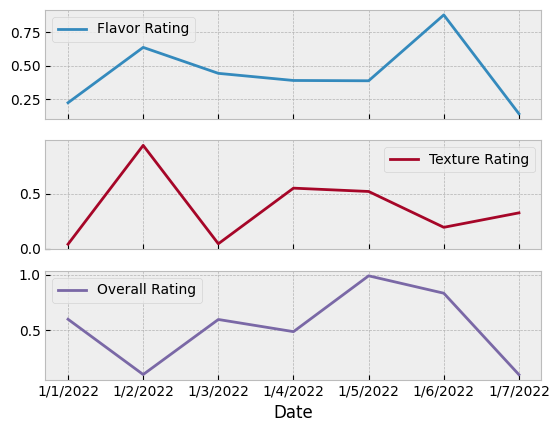

In [ ]:
ice_cream.plot(subplots=True)

<Axes: title={'center': 'Ice Cream Ratings'}, xlabel='Date', ylabel='Rating'>

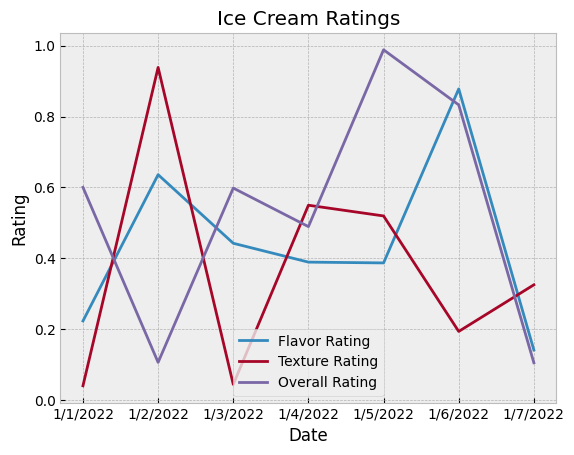

In [ ]:
ice_cream.plot(kind='line',
               xlabel='Date',
               ylabel='Rating',
               title='Ice Cream Ratings')

<Axes: title={'center': 'Ice Cream Ratings'}, xlabel='Date', ylabel='Rating'>

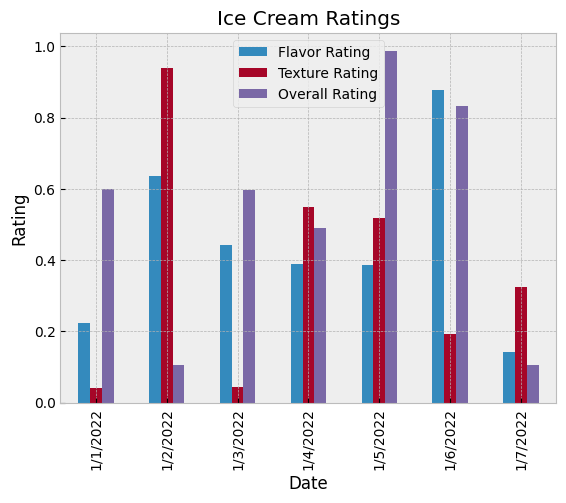

In [ ]:
ice_cream.plot(kind='bar',
               xlabel='Date',
               ylabel='Rating',
               title='Ice Cream Ratings')

<Axes: title={'center': 'Ice Cream Ratings'}, xlabel='Date', ylabel='Rating'>

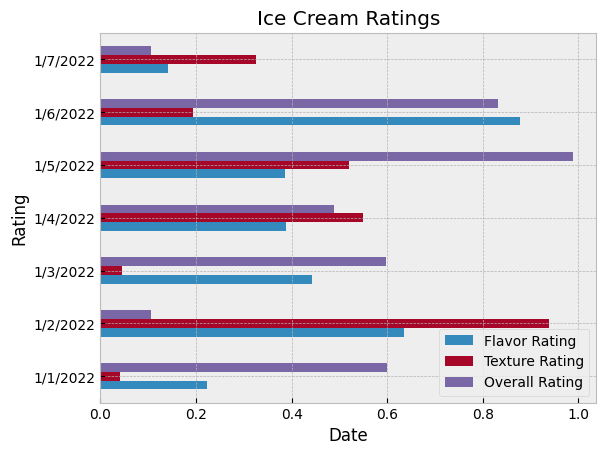

In [ ]:
ice_cream.plot.barh(xlabel='Date',
                    ylabel='Rating',
                    title='Ice Cream Ratings')

<Axes: xlabel='Flavor Rating', ylabel='Texture Rating'>

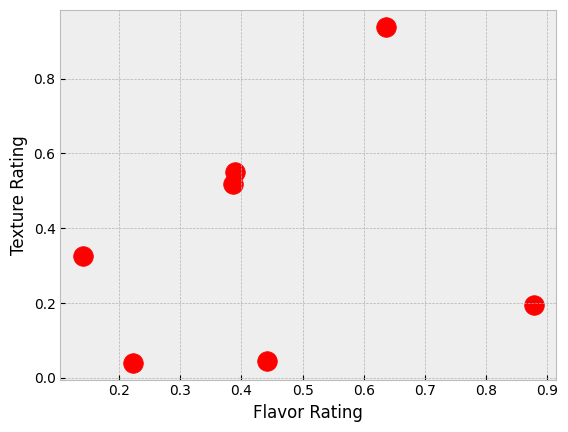

In [ ]:
ice_cream.plot.scatter(x='Flavor Rating',
                       y='Texture Rating',
                       s= 200,
                       c= "Red")

<Axes: ylabel='Frequency'>

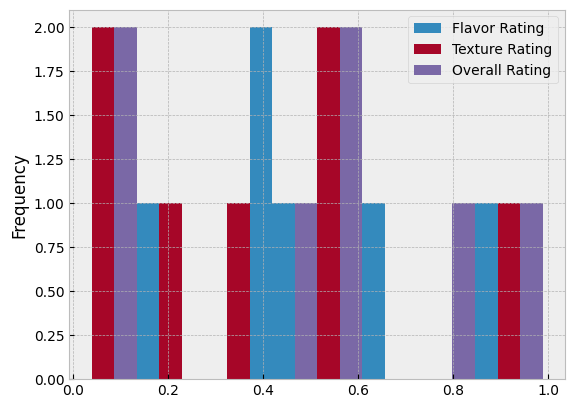

In [ ]:
ice_cream.plot.hist(bins=20)

<Axes: >

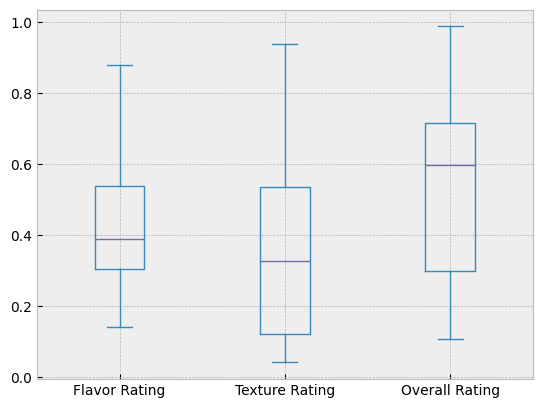

In [ ]:
ice_cream.plot.box()

<Axes: xlabel='Date'>

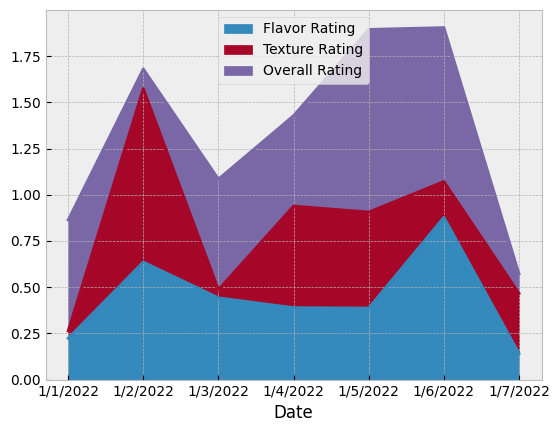

In [ ]:
ice_cream.plot.area()

<Axes: ylabel='Overall Rating'>

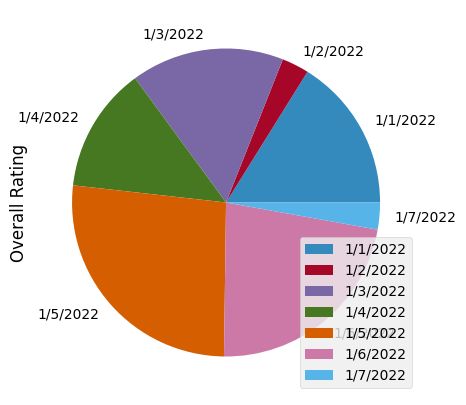

In [ ]:
ice_cream.plot.pie(y='Overall Rating',
                   figsize=(5,5))

# **Data Cleaning**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/Customer Call List.xlsx")
df

CustomerID First_Name    Last_Name  Phone_Number  \
0         1001      Frodo      Baggins  123-545-5421   
1         1002       Abed        Nadir  123/643/9775   
2         1003     Walter       /White    7066950392   
3         1004     Dwight      Schrute  123-543-2345   
4         1005        Jon         Snow  876|678|3469   
5         1006        Ron      Swanson  304-762-2467   
6         1007       Jeff       Winger           NaN   
7         1008   Sherlock       Holmes  876|678|3469   
8         1009    Gandalf          NaN           N/a   
9         1010      Peter       Parker  123-545-5421   
10        1011    Samwise       Gamgee           NaN   
11        1012      Harry    ...Potter    7066950392   
12        1013        Don       Draper  123-543-2345   
13        1014     Leslie        Knope  876|678|3469   
14        1015       Toby  Flenderson_  304-762-2467   
15        1016        Ron      Weasley  123-545-5421   
16        1017   Michael         Scott  123/643/9775   
17        1018      Clark         Kent    7066950392   
18        1019      Creed       Braton           N/a   
19        1020     Anakin    Skywalker  876|678|3469   
20        1020     Anakin    Skywalker  876|678|3469   

                                  Address Paying Customer Do_Not_Contact  \
0                   123 Shire Lane, Shire             Yes             No   
1                     93 West Main Street              No            Yes   
2                      298 Drugs Driveway               N            NaN   
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y   
4                        123 Dragons Road               Y             No   
5                        768 City Parkway             Yes            Yes   
6                       1209 South Street              No             No   
7                           98 Clue Drive               N             No   
8                        123 Middle Earth             Yes            NaN   
9              25th Main Street, New York             Yes             No   
10                  612 Shire Lane, Shire             Yes             No   
11                   2394 Hogwarts Avenue               Y            NaN   
12                       2039 Main Street             Yes              N   
13                       343 City Parkway             Yes             No   
14                          214 HR Avenue               N             No   
15                   2395 Hogwarts Avenue              No              N   
16         121 Paper Avenue, Pennsylvania             Yes             No   
17                        3498 Super Lane               Y            NaN   
18                                    N/a             N/a            Yes   
19            910 Tatooine Road, Tatooine             Yes              N   
20            910 Tatooine Road, Tatooine             Yes              N   

    Not_Useful_Column  
0                True  
1               False  
2                True  
3                True  
4                True  
5                True  
6               False  
7               False  
8               False  
9                True  
10               True  
11               True  
12              False  
13              False  
14              False  
15              False  
16              False  
17               True  
18               True  
19               True  
20               True

In [ ]:
# drop duplicates
df = df.drop_duplicates()
df

CustomerID First_Name    Last_Name  Phone_Number  \
0         1001      Frodo      Baggins  123-545-5421   
1         1002       Abed        Nadir  123/643/9775   
2         1003     Walter       /White    7066950392   
3         1004     Dwight      Schrute  123-543-2345   
4         1005        Jon         Snow  876|678|3469   
5         1006        Ron      Swanson  304-762-2467   
6         1007       Jeff       Winger           NaN   
7         1008   Sherlock       Holmes  876|678|3469   
8         1009    Gandalf          NaN           N/a   
9         1010      Peter       Parker  123-545-5421   
10        1011    Samwise       Gamgee           NaN   
11        1012      Harry    ...Potter    7066950392   
12        1013        Don       Draper  123-543-2345   
13        1014     Leslie        Knope  876|678|3469   
14        1015       Toby  Flenderson_  304-762-2467   
15        1016        Ron      Weasley  123-545-5421   
16        1017   Michael         Scott  123/643/9775   
17        1018      Clark         Kent    7066950392   
18        1019      Creed       Braton           N/a   
19        1020     Anakin    Skywalker  876|678|3469   

                                  Address Paying Customer Do_Not_Contact  \
0                   123 Shire Lane, Shire             Yes             No   
1                     93 West Main Street              No            Yes   
2                      298 Drugs Driveway               N            NaN   
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y   
4                        123 Dragons Road               Y             No   
5                        768 City Parkway             Yes            Yes   
6                       1209 South Street              No             No   
7                           98 Clue Drive               N             No   
8                        123 Middle Earth             Yes            NaN   
9              25th Main Street, New York             Yes             No   
10                  612 Shire Lane, Shire             Yes             No   
11                   2394 Hogwarts Avenue               Y            NaN   
12                       2039 Main Street             Yes              N   
13                       343 City Parkway             Yes             No   
14                          214 HR Avenue               N             No   
15                   2395 Hogwarts Avenue              No              N   
16         121 Paper Avenue, Pennsylvania             Yes             No   
17                        3498 Super Lane               Y            NaN   
18                                    N/a             N/a            Yes   
19            910 Tatooine Road, Tatooine             Yes              N   

    Not_Useful_Column  
0                True  
1               False  
2                True  
3                True  
4                True  
5                True  
6               False  
7               False  
8               False  
9                True  
10               True  
11               True  
12              False  
13              False  
14              False  
15              False  
16              False  
17               True  
18               True  
19               True

In [ ]:
# drop column that we are not use
df = df.drop(columns='Not_Useful_Column')
df

CustomerID First_Name    Last_Name  Phone_Number  \
0         1001      Frodo      Baggins  123-545-5421   
1         1002       Abed        Nadir  123/643/9775   
2         1003     Walter       /White    7066950392   
3         1004     Dwight      Schrute  123-543-2345   
4         1005        Jon         Snow  876|678|3469   
5         1006        Ron      Swanson  304-762-2467   
6         1007       Jeff       Winger           NaN   
7         1008   Sherlock       Holmes  876|678|3469   
8         1009    Gandalf          NaN           N/a   
9         1010      Peter       Parker  123-545-5421   
10        1011    Samwise       Gamgee           NaN   
11        1012      Harry    ...Potter    7066950392   
12        1013        Don       Draper  123-543-2345   
13        1014     Leslie        Knope  876|678|3469   
14        1015       Toby  Flenderson_  304-762-2467   
15        1016        Ron      Weasley  123-545-5421   
16        1017   Michael         Scott  123/643/9775   
17        1018      Clark         Kent    7066950392   
18        1019      Creed       Braton           N/a   
19        1020     Anakin    Skywalker  876|678|3469   

                                  Address Paying Customer Do_Not_Contact  
0                   123 Shire Lane, Shire             Yes             No  
1                     93 West Main Street              No            Yes  
2                      298 Drugs Driveway               N            NaN  
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y  
4                        123 Dragons Road               Y             No  
5                        768 City Parkway             Yes            Yes  
6                       1209 South Street              No             No  
7                           98 Clue Drive               N             No  
8                        123 Middle Earth             Yes            NaN  
9              25th Main Street, New York             Yes             No  
10                  612 Shire Lane, Shire             Yes             No  
11                   2394 Hogwarts Avenue               Y            NaN  
12                       2039 Main Street             Yes              N  
13                       343 City Parkway             Yes             No  
14                          214 HR Avenue               N             No  
15                   2395 Hogwarts Avenue              No              N  
16         121 Paper Avenue, Pennsylvania             Yes             No  
17                        3498 Super Lane               Y            NaN  
18                                    N/a             N/a            Yes  
19            910 Tatooine Road, Tatooine             Yes              N

In [ ]:
remove = ["/","...","_"]
for item in remove:
  df['Last_Name'] = df['Last_Name'].str.strip(item)
df

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
1         1002       Abed       Nadir  123/643/9775   
2         1003     Walter       White    7066950392   
3         1004     Dwight     Schrute  123-543-2345   
4         1005        Jon        Snow  876|678|3469   
5         1006        Ron     Swanson  304-762-2467   
6         1007       Jeff      Winger           NaN   
7         1008   Sherlock      Holmes  876|678|3469   
8         1009    Gandalf         NaN           N/a   
9         1010      Peter      Parker  123-545-5421   
10        1011    Samwise      Gamgee           NaN   
11        1012      Harry      Potter    7066950392   
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876|678|3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123/643/9775   
17        1018      Clark        Kent    7066950392   
18        1019      Creed      Braton           N/a   
19        1020     Anakin   Skywalker  876|678|3469   

                                  Address Paying Customer Do_Not_Contact  
0                   123 Shire Lane, Shire             Yes             No  
1                     93 West Main Street              No            Yes  
2                      298 Drugs Driveway               N            NaN  
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y  
4                        123 Dragons Road               Y             No  
5                        768 City Parkway             Yes            Yes  
6                       1209 South Street              No             No  
7                           98 Clue Drive               N             No  
8                        123 Middle Earth             Yes            NaN  
9              25th Main Street, New York             Yes             No  
10                  612 Shire Lane, Shire             Yes             No  
11                   2394 Hogwarts Avenue               Y            NaN  
12                       2039 Main Street             Yes              N  
13                       343 City Parkway             Yes             No  
14                          214 HR Avenue               N             No  
15                   2395 Hogwarts Avenue              No              N  
16         121 Paper Avenue, Pennsylvania             Yes             No  
17                        3498 Super Lane               Y            NaN  
18                                    N/a             N/a            Yes  
19            910 Tatooine Road, Tatooine             Yes              N

In [ ]:
df['Phone_Number'] = df['Phone_Number'].str.replace('[^a-zA-Z0-9]','',regex=True)
df

CustomerID First_Name   Last_Name Phone_Number  \
0         1001      Frodo     Baggins   1235455421   
1         1002       Abed       Nadir   1236439775   
2         1003     Walter       White          NaN   
3         1004     Dwight     Schrute   1235432345   
4         1005        Jon        Snow   8766783469   
5         1006        Ron     Swanson   3047622467   
6         1007       Jeff      Winger          NaN   
7         1008   Sherlock      Holmes   8766783469   
8         1009    Gandalf         NaN           Na   
9         1010      Peter      Parker   1235455421   
10        1011    Samwise      Gamgee          NaN   
11        1012      Harry      Potter          NaN   
12        1013        Don      Draper   1235432345   
13        1014     Leslie       Knope   8766783469   
14        1015       Toby  Flenderson   3047622467   
15        1016        Ron     Weasley   1235455421   
16        1017   Michael        Scott   1236439775   
17        1018      Clark        Kent          NaN   
18        1019      Creed      Braton           Na   
19        1020     Anakin   Skywalker   8766783469   

                                  Address Paying Customer Do_Not_Contact  
0                   123 Shire Lane, Shire             Yes             No  
1                     93 West Main Street              No            Yes  
2                      298 Drugs Driveway               N            NaN  
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y  
4                        123 Dragons Road               Y             No  
5                        768 City Parkway             Yes            Yes  
6                       1209 South Street              No             No  
7                           98 Clue Drive               N             No  
8                        123 Middle Earth             Yes            NaN  
9              25th Main Street, New York             Yes             No  
10                  612 Shire Lane, Shire             Yes             No  
11                   2394 Hogwarts Avenue               Y            NaN  
12                       2039 Main Street             Yes              N  
13                       343 City Parkway             Yes             No  
14                          214 HR Avenue               N             No  
15                   2395 Hogwarts Avenue              No              N  
16         121 Paper Avenue, Pennsylvania             Yes             No  
17                        3498 Super Lane               Y            NaN  
18                                    N/a             N/a            Yes  
19            910 Tatooine Road, Tatooine             Yes              N

In [ ]:
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: str(x))
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: x[0:3] + '-' + x[3:6] + '-' + x[6:10])
df

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
1         1002       Abed       Nadir  123-643-9775   
2         1003     Walter       White         nan--   
3         1004     Dwight     Schrute  123-543-2345   
4         1005        Jon        Snow  876-678-3469   
5         1006        Ron     Swanson  304-762-2467   
6         1007       Jeff      Winger         nan--   
7         1008   Sherlock      Holmes  876-678-3469   
8         1009    Gandalf         NaN          Na--   
9         1010      Peter      Parker  123-545-5421   
10        1011    Samwise      Gamgee         nan--   
11        1012      Harry      Potter         nan--   
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876-678-3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123-643-9775   
17        1018      Clark        Kent         nan--   
18        1019      Creed      Braton          Na--   
19        1020     Anakin   Skywalker  876-678-3469   

                                  Address Paying Customer Do_Not_Contact  
0                   123 Shire Lane, Shire             Yes             No  
1                     93 West Main Street              No            Yes  
2                      298 Drugs Driveway               N            NaN  
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y  
4                        123 Dragons Road               Y             No  
5                        768 City Parkway             Yes            Yes  
6                       1209 South Street              No             No  
7                           98 Clue Drive               N             No  
8                        123 Middle Earth             Yes            NaN  
9              25th Main Street, New York             Yes             No  
10                  612 Shire Lane, Shire             Yes             No  
11                   2394 Hogwarts Avenue               Y            NaN  
12                       2039 Main Street             Yes              N  
13                       343 City Parkway             Yes             No  
14                          214 HR Avenue               N             No  
15                   2395 Hogwarts Avenue              No              N  
16         121 Paper Avenue, Pennsylvania             Yes             No  
17                        3498 Super Lane               Y            NaN  
18                                    N/a             N/a            Yes  
19            910 Tatooine Road, Tatooine             Yes              N

In [ ]:
df['Phone_Number'] = df['Phone_Number'].str.replace('nan--','')
df['Phone_Number'] = df['Phone_Number'].str.replace('Na--','')
df

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
1         1002       Abed       Nadir  123-643-9775   
2         1003     Walter       White                 
3         1004     Dwight     Schrute  123-543-2345   
4         1005        Jon        Snow  876-678-3469   
5         1006        Ron     Swanson  304-762-2467   
6         1007       Jeff      Winger                 
7         1008   Sherlock      Holmes  876-678-3469   
8         1009    Gandalf         NaN                 
9         1010      Peter      Parker  123-545-5421   
10        1011    Samwise      Gamgee                 
11        1012      Harry      Potter                 
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876-678-3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123-643-9775   
17        1018      Clark        Kent                 
18        1019      Creed      Braton                 
19        1020     Anakin   Skywalker  876-678-3469   

                                  Address Paying Customer Do_Not_Contact  
0                   123 Shire Lane, Shire             Yes             No  
1                     93 West Main Street              No            Yes  
2                      298 Drugs Driveway               N            NaN  
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y  
4                        123 Dragons Road               Y             No  
5                        768 City Parkway             Yes            Yes  
6                       1209 South Street              No             No  
7                           98 Clue Drive               N             No  
8                        123 Middle Earth             Yes            NaN  
9              25th Main Street, New York             Yes             No  
10                  612 Shire Lane, Shire             Yes             No  
11                   2394 Hogwarts Avenue               Y            NaN  
12                       2039 Main Street             Yes              N  
13                       343 City Parkway             Yes             No  
14                          214 HR Avenue               N             No  
15                   2395 Hogwarts Avenue              No              N  
16         121 Paper Avenue, Pennsylvania             Yes             No  
17                        3498 Super Lane               Y            NaN  
18                                    N/a             N/a            Yes  
19            910 Tatooine Road, Tatooine             Yes              N

In [ ]:
df[["Street Address","State","Zip Code"]] =  df['Address'].str.split(',', expand=True)
df

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
1         1002       Abed       Nadir  123-643-9775   
2         1003     Walter       White                 
3         1004     Dwight     Schrute  123-543-2345   
4         1005        Jon        Snow  876-678-3469   
5         1006        Ron     Swanson  304-762-2467   
6         1007       Jeff      Winger                 
7         1008   Sherlock      Holmes  876-678-3469   
8         1009    Gandalf         NaN                 
9         1010      Peter      Parker  123-545-5421   
10        1011    Samwise      Gamgee                 
11        1012      Harry      Potter                 
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876-678-3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123-643-9775   
17        1018      Clark        Kent                 
18        1019      Creed      Braton                 
19        1020     Anakin   Skywalker  876-678-3469   

                                  Address Paying Customer Do_Not_Contact  \
0                   123 Shire Lane, Shire             Yes             No   
1                     93 West Main Street              No            Yes   
2                      298 Drugs Driveway               N            NaN   
3   980 Paper Avenue, Pennsylvania, 18503             Yes              Y   
4                        123 Dragons Road               Y             No   
5                        768 City Parkway             Yes            Yes   
6                       1209 South Street              No             No   
7                           98 Clue Drive               N             No   
8                        123 Middle Earth             Yes            NaN   
9              25th Main Street, New York             Yes             No   
10                  612 Shire Lane, Shire             Yes             No   
11                   2394 Hogwarts Avenue               Y            NaN   
12                       2039 Main Street             Yes              N   
13                       343 City Parkway             Yes             No   
14                          214 HR Avenue               N             No   
15                   2395 Hogwarts Avenue              No              N   
16         121 Paper Avenue, Pennsylvania             Yes             No   
17                        3498 Super Lane               Y            NaN   
18                                    N/a             N/a            Yes   
19            910 Tatooine Road, Tatooine             Yes              N   

          Street Address          State Zip Code  
0         123 Shire Lane          Shire     None  
1    93 West Main Street           None     None  
2     298 Drugs Driveway           None     None  
3       980 Paper Avenue   Pennsylvania    18503  
4       123 Dragons Road           None     None  
5       768 City Parkway           None     None  
6      1209 South Street           None     None  
7          98 Clue Drive           None     None  
8       123 Middle Earth           None     None  
9       25th Main Street       New York     None  
10        612 Shire Lane          Shire     None  
11  2394 Hogwarts Avenue           None     None  
12      2039 Main Street           None     None  
13      343 City Parkway           None     None  
14         214 HR Avenue           None     None  
15  2395 Hogwarts Avenue           None     None  
16      121 Paper Avenue   Pennsylvania     None  
17       3498 Super Lane           None     None  
18                   N/a           None     None  
19     910 Tatooine Road       Tatooine     None

In [ ]:
df['Paying Customer'] = df['Paying Customer'].str.replace('Yes','Y')
df['Paying Customer'] = df['Paying Customer'].str.replace('No','N')
df['Do_Not_Contact' ] = df['Do_Not_Contact'].str.replace('Yes','Y')
df['Do_Not_Contact' ] = df['Do_Not_Contact'].str.replace('No','N')
df

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
1         1002       Abed       Nadir  123-643-9775   
2         1003     Walter       White                 
3         1004     Dwight     Schrute  123-543-2345   
4         1005        Jon        Snow  876-678-3469   
5         1006        Ron     Swanson  304-762-2467   
6         1007       Jeff      Winger                 
7         1008   Sherlock      Holmes  876-678-3469   
8         1009    Gandalf         NaN                 
9         1010      Peter      Parker  123-545-5421   
10        1011    Samwise      Gamgee                 
11        1012      Harry      Potter                 
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876-678-3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123-643-9775   
17        1018      Clark        Kent                 
18        1019      Creed      Braton                 
19        1020     Anakin   Skywalker  876-678-3469   

                                  Address Paying Customer Do_Not_Contact  \
0                   123 Shire Lane, Shire               Y              N   
1                     93 West Main Street               N              Y   
2                      298 Drugs Driveway               N            NaN   
3   980 Paper Avenue, Pennsylvania, 18503               Y              Y   
4                        123 Dragons Road               Y              N   
5                        768 City Parkway               Y              Y   
6                       1209 South Street               N              N   
7                           98 Clue Drive               N              N   
8                        123 Middle Earth               Y            NaN   
9              25th Main Street, New York               Y              N   
10                  612 Shire Lane, Shire               Y              N   
11                   2394 Hogwarts Avenue               Y            NaN   
12                       2039 Main Street               Y              N   
13                       343 City Parkway               Y              N   
14                          214 HR Avenue               N              N   
15                   2395 Hogwarts Avenue               N              N   
16         121 Paper Avenue, Pennsylvania               Y              N   
17                        3498 Super Lane               Y            NaN   
18                                    N/a             N/a              Y   
19            910 Tatooine Road, Tatooine               Y              N   

          Street Address          State Zip Code  
0         123 Shire Lane          Shire     None  
1    93 West Main Street           None     None  
2     298 Drugs Driveway           None     None  
3       980 Paper Avenue   Pennsylvania    18503  
4       123 Dragons Road           None     None  
5       768 City Parkway           None     None  
6      1209 South Street           None     None  
7          98 Clue Drive           None     None  
8       123 Middle Earth           None     None  
9       25th Main Street       New York     None  
10        612 Shire Lane          Shire     None  
11  2394 Hogwarts Avenue           None     None  
12      2039 Main Street           None     None  
13      343 City Parkway           None     None  
14         214 HR Avenue           None     None  
15  2395 Hogwarts Avenue           None     None  
16      121 Paper Avenue   Pennsylvania     None  
17       3498 Super Lane           None     None  
18                   N/a           None     None  
19     910 Tatooine Road       Tatooine     None

In [ ]:
df = df.replace('N/a','')
#df = df.replace('NaN','')
df = df.fillna('')
df

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
1         1002       Abed       Nadir  123-643-9775   
2         1003     Walter       White                 
3         1004     Dwight     Schrute  123-543-2345   
4         1005        Jon        Snow  876-678-3469   
5         1006        Ron     Swanson  304-762-2467   
6         1007       Jeff      Winger                 
7         1008   Sherlock      Holmes  876-678-3469   
8         1009    Gandalf                             
9         1010      Peter      Parker  123-545-5421   
10        1011    Samwise      Gamgee                 
11        1012      Harry      Potter                 
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876-678-3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123-643-9775   
17        1018      Clark        Kent                 
18        1019      Creed      Braton                 
19        1020     Anakin   Skywalker  876-678-3469   

                                  Address Paying Customer Do_Not_Contact  \
0                   123 Shire Lane, Shire               Y              N   
1                     93 West Main Street               N              Y   
2                      298 Drugs Driveway               N                  
3   980 Paper Avenue, Pennsylvania, 18503               Y              Y   
4                        123 Dragons Road               Y              N   
5                        768 City Parkway               Y              Y   
6                       1209 South Street               N              N   
7                           98 Clue Drive               N              N   
8                        123 Middle Earth               Y                  
9              25th Main Street, New York               Y              N   
10                  612 Shire Lane, Shire               Y              N   
11                   2394 Hogwarts Avenue               Y                  
12                       2039 Main Street               Y              N   
13                       343 City Parkway               Y              N   
14                          214 HR Avenue               N              N   
15                   2395 Hogwarts Avenue               N              N   
16         121 Paper Avenue, Pennsylvania               Y              N   
17                        3498 Super Lane               Y                  
18                                                                     Y   
19            910 Tatooine Road, Tatooine               Y              N   

          Street Address          State Zip Code  
0         123 Shire Lane          Shire           
1    93 West Main Street                          
2     298 Drugs Driveway                          
3       980 Paper Avenue   Pennsylvania    18503  
4       123 Dragons Road                          
5       768 City Parkway                          
6      1209 South Street                          
7          98 Clue Drive                          
8       123 Middle Earth                          
9       25th Main Street       New York           
10        612 Shire Lane          Shire           
11  2394 Hogwarts Avenue                          
12      2039 Main Street                          
13      343 City Parkway                          
14         214 HR Avenue                          
15  2395 Hogwarts Avenue                          
16      121 Paper Avenue   Pennsylvania           
17       3498 Super Lane                          
18                                                
19     910 Tatooine Road       Tatooine

In [ ]:
for x in df.index:
  if df.loc[x, "Do_Not_Contact"] == 'Y':
    df.drop(x, inplace=True)
df

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
2         1003     Walter       White                 
4         1005        Jon        Snow  876-678-3469   
6         1007       Jeff      Winger                 
7         1008   Sherlock      Holmes  876-678-3469   
8         1009    Gandalf                             
9         1010      Peter      Parker  123-545-5421   
10        1011    Samwise      Gamgee                 
11        1012      Harry      Potter                 
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876-678-3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123-643-9775   
17        1018      Clark        Kent                 
19        1020     Anakin   Skywalker  876-678-3469   

                           Address Paying Customer Do_Not_Contact  \
0            123 Shire Lane, Shire               Y              N   
2               298 Drugs Driveway               N                  
4                 123 Dragons Road               Y              N   
6                1209 South Street               N              N   
7                    98 Clue Drive               N              N   
8                 123 Middle Earth               Y                  
9       25th Main Street, New York               Y              N   
10           612 Shire Lane, Shire               Y              N   
11            2394 Hogwarts Avenue               Y                  
12                2039 Main Street               Y              N   
13                343 City Parkway               Y              N   
14                   214 HR Avenue               N              N   
15            2395 Hogwarts Avenue               N              N   
16  121 Paper Avenue, Pennsylvania               Y              N   
17                 3498 Super Lane               Y                  
19     910 Tatooine Road, Tatooine               Y              N   

          Street Address          State Zip Code  
0         123 Shire Lane          Shire           
2     298 Drugs Driveway                          
4       123 Dragons Road                          
6      1209 South Street                          
7          98 Clue Drive                          
8       123 Middle Earth                          
9       25th Main Street       New York           
10        612 Shire Lane          Shire           
11  2394 Hogwarts Avenue                          
12      2039 Main Street                          
13      343 City Parkway                          
14         214 HR Avenue                          
15  2395 Hogwarts Avenue                          
16      121 Paper Avenue   Pennsylvania           
17       3498 Super Lane                          
19     910 Tatooine Road       Tatooine

In [ ]:
for x in df.index:
  if df.loc[x, "Phone_Number"] == '':
    df.drop(x, inplace=True)
df

#df.dropna(subset = "Phone_Number",inplace = True)

CustomerID First_Name   Last_Name  Phone_Number  \
0         1001      Frodo     Baggins  123-545-5421   
4         1005        Jon        Snow  876-678-3469   
7         1008   Sherlock      Holmes  876-678-3469   
9         1010      Peter      Parker  123-545-5421   
12        1013        Don      Draper  123-543-2345   
13        1014     Leslie       Knope  876-678-3469   
14        1015       Toby  Flenderson  304-762-2467   
15        1016        Ron     Weasley  123-545-5421   
16        1017   Michael        Scott  123-643-9775   
19        1020     Anakin   Skywalker  876-678-3469   

                           Address Paying Customer Do_Not_Contact  \
0            123 Shire Lane, Shire               Y              N   
4                 123 Dragons Road               Y              N   
7                    98 Clue Drive               N              N   
9       25th Main Street, New York               Y              N   
12                2039 Main Street               Y              N   
13                343 City Parkway               Y              N   
14                   214 HR Avenue               N              N   
15            2395 Hogwarts Avenue               N              N   
16  121 Paper Avenue, Pennsylvania               Y              N   
19     910 Tatooine Road, Tatooine               Y              N   

          Street Address          State Zip Code  
0         123 Shire Lane          Shire           
4       123 Dragons Road                          
7          98 Clue Drive                          
9       25th Main Street       New York           
12      2039 Main Street                          
13      343 City Parkway                          
14         214 HR Avenue                          
15  2395 Hogwarts Avenue                          
16      121 Paper Avenue   Pennsylvania           
19     910 Tatooine Road       Tatooine

In [ ]:
df = df.reset_index(drop=True)
df

CustomerID First_Name   Last_Name  Phone_Number  \
0        1001      Frodo     Baggins  123-545-5421   
1        1005        Jon        Snow  876-678-3469   
2        1008   Sherlock      Holmes  876-678-3469   
3        1010      Peter      Parker  123-545-5421   
4        1013        Don      Draper  123-543-2345   
5        1014     Leslie       Knope  876-678-3469   
6        1015       Toby  Flenderson  304-762-2467   
7        1016        Ron     Weasley  123-545-5421   
8        1017   Michael        Scott  123-643-9775   
9        1020     Anakin   Skywalker  876-678-3469   

                          Address Paying Customer Do_Not_Contact  \
0           123 Shire Lane, Shire               Y              N   
1                123 Dragons Road               Y              N   
2                   98 Clue Drive               N              N   
3      25th Main Street, New York               Y              N   
4                2039 Main Street               Y              N   
5                343 City Parkway               Y              N   
6                   214 HR Avenue               N              N   
7            2395 Hogwarts Avenue               N              N   
8  121 Paper Avenue, Pennsylvania               Y              N   
9     910 Tatooine Road, Tatooine               Y              N   

         Street Address          State Zip Code  
0        123 Shire Lane          Shire           
1      123 Dragons Road                          
2         98 Clue Drive                          
3      25th Main Street       New York           
4      2039 Main Street                          
5      343 City Parkway                          
6         214 HR Avenue                          
7  2395 Hogwarts Avenue                          
8      121 Paper Avenue   Pennsylvania           
9     910 Tatooine Road       Tatooine

In [ ]:
df.drop(columns='Address', inplace=True)
df

CustomerID First_Name   Last_Name  Phone_Number Paying Customer  \
0        1001      Frodo     Baggins  123-545-5421               Y   
1        1005        Jon        Snow  876-678-3469               Y   
2        1008   Sherlock      Holmes  876-678-3469               N   
3        1010      Peter      Parker  123-545-5421               Y   
4        1013        Don      Draper  123-543-2345               Y   
5        1014     Leslie       Knope  876-678-3469               Y   
6        1015       Toby  Flenderson  304-762-2467               N   
7        1016        Ron     Weasley  123-545-5421               N   
8        1017   Michael        Scott  123-643-9775               Y   
9        1020     Anakin   Skywalker  876-678-3469               Y   

  Do_Not_Contact        Street Address          State Zip Code  
0              N        123 Shire Lane          Shire           
1              N      123 Dragons Road                          
2              N         98 Clue Drive                          
3              N      25th Main Street       New York           
4              N      2039 Main Street                          
5              N      343 City Parkway                          
6              N         214 HR Avenue                          
7              N  2395 Hogwarts Avenue                          
8              N      121 Paper Avenue   Pennsylvania           
9              N     910 Tatooine Road       Tatooine

In [ ]:
df.drop(columns='Zip Code', inplace=True)
df

CustomerID First_Name   Last_Name  Phone_Number Paying Customer  \
0        1001      Frodo     Baggins  123-545-5421               Y   
1        1005        Jon        Snow  876-678-3469               Y   
2        1008   Sherlock      Holmes  876-678-3469               N   
3        1010      Peter      Parker  123-545-5421               Y   
4        1013        Don      Draper  123-543-2345               Y   
5        1014     Leslie       Knope  876-678-3469               Y   
6        1015       Toby  Flenderson  304-762-2467               N   
7        1016        Ron     Weasley  123-545-5421               N   
8        1017   Michael        Scott  123-643-9775               Y   
9        1020     Anakin   Skywalker  876-678-3469               Y   

  Do_Not_Contact        Street Address          State  
0              N        123 Shire Lane          Shire  
1              N      123 Dragons Road                 
2              N         98 Clue Drive                 
3              N      25th Main Street       New York  
4              N      2039 Main Street                 
5              N      343 City Parkway                 
6              N         214 HR Avenue                 
7              N  2395 Hogwarts Avenue                 
8              N      121 Paper Avenue   Pennsylvania  
9              N     910 Tatooine Road       Tatooine

In [ ]:
df.to_csv('cleaned_data.csv')

# **EDA (Exploratory Data Analysis)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/world_population.csv')
df.head()

Rank CCA3         Country           Capital Continent  2022 Population  \
0    36  AFG     Afghanistan             Kabul      Asia       41128771.0   
1   138  ALB         Albania            Tirana    Europe        2842321.0   
2    34  DZA         Algeria           Algiers    Africa       44903225.0   
3   213  ASM  American Samoa         Pago Pago   Oceania          44273.0   
4   203  AND         Andorra  Andorra la Vella    Europe          79824.0   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0       38972230.0       33753499.0       28189672.0       19542982.0   
1        2866849.0        2882481.0        2913399.0        3182021.0   
2       43451666.0       39543154.0       35856344.0       30774621.0   
3          46189.0          51368.0          54849.0          58230.0   
4          77700.0          71746.0          71519.0          66097.0   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0       10694796.0       12486631.0       10752971.0    652230.0   
1        3295066.0        2941651.0        2324731.0     28748.0   
2       25518074.0       18739378.0       13795915.0   2381741.0   
3          47818.0          32886.0          27075.0       199.0   
4          53569.0          35611.0          19860.0       468.0   

   Density (per km²)  Growth Rate  World Population Percentage  
0               63.1          1.0                          0.5  
1               98.9          1.0                          0.0  
2               18.9          1.0                          0.6  
3              222.5          1.0                          0.0  
4              170.6          1.0                          0.0

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [ ]:
df.describe()

Rank  2022 Population  2020 Population  2015 Population  \
count 234.00           230.00           233.00           230.00   
mean  117.50      34632250.88      33600710.95      32066004.16   
std    67.69     137889172.44     135873196.61     131507146.34   
min     1.00           510.00           520.00           564.00   
25%    59.25        419738.50        406471.00        394295.00   
50%   117.50       5762857.00       5456681.00       5244415.00   
75%   175.75      22653719.00      21522626.00      19730853.75   
max   234.00    1425887337.00    1424929781.00    1393715448.00   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count           227.00           227.00           229.00           229.00   
mean       30270164.48      26840495.26      19330463.93      16282884.78   
std       126074183.54     113352454.57      81309624.96      69345465.54   
min             596.00           651.00           700.00           733.00   
25%          382726.50        329470.00        261928.00        223752.00   
50%         4889741.00       4491202.00       3785847.00       3135123.00   
75%        16825852.50      15625467.00      11882762.00       9817257.00   
max      1348191368.00    1264099069.00    1153704252.00     982372466.00   

       1970 Population  Area (km²)  Density (per km²)  Growth Rate  \
count           230.00      232.00             230.00       232.00   
mean       15866499.13   581663.75             456.81         1.01   
std        68355859.75  1769133.06            2083.74         0.01   
min             752.00        1.00               0.03         0.91   
25%          145880.50     2567.25              36.60         1.00   
50%         2511718.00    77141.00              95.35         1.01   
75%         8817329.00   414643.25             236.88         1.02   
max       822534450.00 17098242.00           23172.27         1.07   

       World Population Percentage  
count                       234.00  
mean                          0.43  
std                           1.71  
min                           0.00  
25%                           0.01  
50%                           0.07  
75%                           0.28  
max                          17.88

In [ ]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [ ]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [ ]:
df.sort_values(by='World Population Percentage', ascending=False).head(10)

Rank CCA3        Country           Capital      Continent  \
41      1  CHN          China           Beijing           Asia   
92      2  IND          India         New Delhi           Asia   
221     3  USA  United States  Washington, D.C.  North America   
93      4  IDN      Indonesia           Jakarta           Asia   
156     5  PAK       Pakistan         Islamabad           Asia   
149     6  NGA        Nigeria             Abuja         Africa   
27      7  BRA         Brazil          Brasilia  South America   
16      8  BGD     Bangladesh             Dhaka           Asia   
171     9  RUS         Russia            Moscow         Europe   
131    10  MEX         Mexico       Mexico City  North America   

     2022 Population  2020 Population  2015 Population  2010 Population  \
41     1425887337.00    1424929781.00    1393715448.00    1348191368.00   
92     1417173173.00    1396387127.00    1322866505.00    1240613620.00   
221     338289857.00     335942003.00     324607776.00     311182845.00   
93      275501339.00     271857970.00     259091970.00     244016173.00   
156     235824862.00     227196741.00     210969298.00     194454498.00   
149     218541212.00     208327405.00     183995785.00     160952853.00   
27      215313498.00     213196304.00     205188205.00     196353492.00   
16      171186372.00     167420951.00     157830000.00     148391139.00   
171     144713314.00     145617329.00     144668389.00     143242599.00   
131     127504125.00     125998302.00     120149897.00     112532401.00   

     2000 Population  1990 Population  1980 Population  1970 Population  \
41     1264099069.00    1153704252.00     982372466.00     822534450.00   
92     1059633675.00              NaN              NaN     557501301.00   
221     282398554.00     248083732.00     223140018.00     200328340.00   
93      214072421.00     182159874.00     148177096.00     115228394.00   
156     154369924.00     115414069.00      80624057.00      59290872.00   
149     122851984.00      95214257.00      72951439.00      55569264.00   
27      175873720.00     150706446.00     122288383.00      96369875.00   
16      129193327.00     107147651.00      83929765.00      67541860.00   
171     146844839.00     148005704.00     138257420.00     130093010.00   
131      97873442.00      81720428.00      67705186.00      50289306.00   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
41   9706961.00             146.89         1.00                        17.88  
92   3287590.00             431.07         1.01                        17.77  
221  9372610.00              36.09         1.00                         4.24  
93   1904569.00             144.65         1.01                         3.45  
156   881912.00             267.40         1.02                         2.96  
149   923768.00             236.58         1.02                         2.74  
27   8515767.00              25.28         1.00                         2.70  
16    147570.00            1160.04         1.01                         2.15  
171 17098242.00               8.46         1.00                         1.81  
131  1964375.00              64.91         1.01                         1.60

In [ ]:
df.corr(numeric_only=True)

Rank  2022 Population  2020 Population  \
Rank                         1.00            -0.36            -0.36   
2022 Population             -0.36             1.00             1.00   
2020 Population             -0.36             1.00             1.00   
2015 Population             -0.35             1.00             1.00   
2010 Population             -0.35             1.00             1.00   
2000 Population             -0.34             0.99             1.00   
1990 Population             -0.33             0.99             0.99   
1980 Population             -0.33             0.99             0.99   
1970 Population             -0.34             0.97             0.98   
Area (km²)                  -0.38             0.45             0.45   
Density (per km²)            0.13            -0.03            -0.03   
Growth Rate                 -0.22            -0.02            -0.03   
World Population Percentage -0.36             1.00             1.00   

                             2015 Population  2010 Population  \
Rank                                   -0.35            -0.35   
2022 Population                         1.00             1.00   
2020 Population                         1.00             1.00   
2015 Population                         1.00             1.00   
2010 Population                         1.00             1.00   
2000 Population                         1.00             1.00   
1990 Population                         0.99             1.00   
1980 Population                         0.99             0.99   
1970 Population                         0.98             0.98   
Area (km²)                              0.46             0.46   
Density (per km²)                      -0.03            -0.03   
Growth Rate                            -0.03            -0.04   
World Population Percentage             1.00             1.00   

                             2000 Population  1990 Population  \
Rank                                   -0.34            -0.33   
2022 Population                         0.99             0.99   
2020 Population                         1.00             0.99   
2015 Population                         1.00             0.99   
2010 Population                         1.00             1.00   
2000 Population                         1.00             1.00   
1990 Population                         1.00             1.00   
1980 Population                         1.00             1.00   
1970 Population                         0.99             1.00   
Area (km²)                              0.47             0.52   
Density (per km²)                      -0.03            -0.03   
Growth Rate                            -0.05            -0.07   
World Population Percentage             0.99             0.99   

                             1980 Population  1970 Population  Area (km²)  \
Rank                                   -0.33            -0.34       -0.38   
2022 Population                         0.99             0.97        0.45   
2020 Population                         0.99             0.98        0.45   
2015 Population                         0.99             0.98        0.46   
2010 Population                         0.99             0.98        0.46   
2000 Population                         1.00             0.99        0.47   
1990 Population                         1.00             1.00        0.52   
1980 Population                         1.00             1.00        0.53   
1970 Population                         1.00             1.00        0.51   
Area (km²)                              0.53             0.51        1.00   
Density (per km²)                      -0.03            -0.03       -0.06   
Growth Rate                            -0.08            -0.08       -0.01   
World Population Percentage             0.99             0.97        0.45   

                             Density (per km²)  Growth Rate  \
Rank                                      0.13        -0.22   
2022 Po

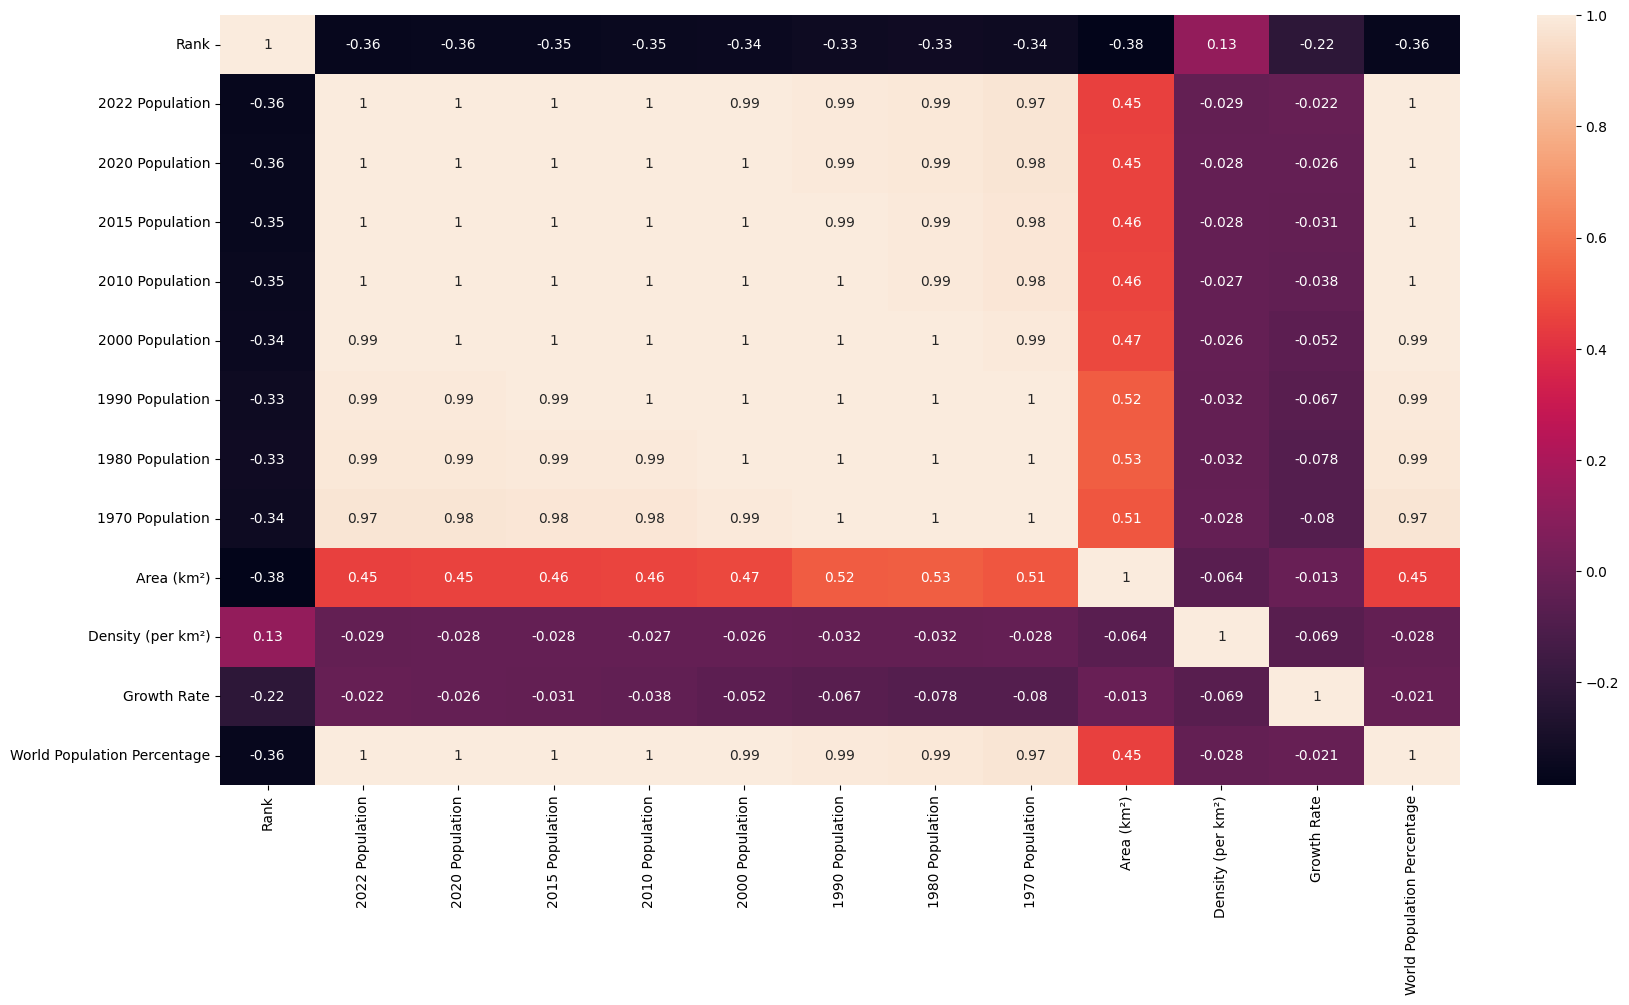

In [ ]:
sns.heatmap(df.corr(numeric_only=True)  )
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

In [ ]:
df.groupby('Continent').mean(numeric_only=True).sort_values(by='World Population Percentage', ascending=False)

Rank  2022 Population  2020 Population  2015 Population  \
Continent                                                                 
Asia           77.56      96327387.31      94955134.37      89165003.64   
South America  97.57      31201186.29      30823574.50      29509599.71   
Africa         92.16      25455879.68      23871435.26      21419703.57   
North America 160.93      15007403.40      14855914.82      14259596.25   
Europe        124.50      15055371.82      14915843.92      15027454.12   
Oceania       188.52       2046386.32       1910148.96       1756664.48   

               2010 Population  2000 Population  1990 Population  \
Continent                                                          
Asia               89087770.00      80580835.11      48639995.33   
South America      26789395.54      25015888.69      21224743.93   
Africa             18898197.31      14598365.95      11376964.52   
North America      13568016.28      12151739.60      10531660.62   
Europe             14712278.68      14817685.71      14785203.94   
Oceania             1613163.65       1357512.09       1162774.87   

               1980 Population  1970 Population  Area (km²)  \
Continent                                                     
Asia               40278333.33      43839877.83   642762.82   
South America      17270643.29      13781939.71  1301302.85   
Africa              8586031.98       6567175.27   537879.30   
North America       9207334.03       7885865.15   606104.45   
Europe             14200004.52      13118479.82   460208.22   
Oceania              996532.17        846968.26   370220.91   

               Density (per km²)  Growth Rate  World Population Percentage  
Continent                                                                   
Asia                     1025.02         1.01                         1.18  
South America              20.97         1.01                         0.39  
Africa                    126.41         1.02                         0.31  
North America             272.49         1.00                         0.19  
Europe                    663.32         1.00                         0.19  
Oceania                   132.54         1.01                         0.02

In [ ]:
df[df['Continent'].str.contains('Oceania')]

Rank CCA3                   Country       Capital Continent  \
3     213  ASM            American Samoa     Pago Pago   Oceania   
11     55  AUS                 Australia      Canberra   Oceania   
44    223  COK              Cook Islands        Avarua   Oceania   
66    162  FJI                      Fiji          Suva   Oceania   
70    183  PYF          French Polynesia       Papeete   Oceania   
81    191  GUM                      Guam       Hagåtña   Oceania   
107   192  KIR                  Kiribati        Tarawa   Oceania   
126   215  MHL          Marshall Islands        Majuro   Oceania   
132   194  FSM                Micronesia       Palikir   Oceania   
142   225  NRU                     Nauru         Yaren   Oceania   
145   185  NCL             New Caledonia        Nouméa   Oceania   
146   123  NZL               New Zealand    Wellington   Oceania   
150   232  NIU                      Niue         Alofi   Oceania   
153   210  NFK  Northern Mariana Islands        Saipan   Oceania   
157   222  PLW                     Palau     Ngerulmud   Oceania   
160    93  PNG          Papua New Guinea  Port Moresby   Oceania   
179   188  WSM                     Samoa          Apia   Oceania   
191   166  SLB           Solomon Islands       Honiara   Oceania   
209   233  TKL                   Tokelau      Nukunonu   Oceania   
210   197  TON                     Tonga    Nuku‘alofa   Oceania   
216   227  TUV                    Tuvalu      Funafuti   Oceania   
225   181  VUT                   Vanuatu     Port-Vila   Oceania   
229   226  WLF         Wallis and Futuna      Mata-Utu   Oceania   

     2022 Population  2020 Population  2015 Population  2010 Population  \
3           44273.00         46189.00         51368.00         54849.00   
11       26177413.00      25670051.00      23820236.00      22019168.00   
44          17011.00         17029.00         17695.00         17212.00   
66         929766.00        920422.00        917200.00        905169.00   
70         306279.00        301920.00        291787.00        283788.00   
81         171774.00        169231.00        167978.00        164905.00   
107        131232.00        126463.00        116707.00        107995.00   
126         41569.00         43413.00         49410.00         53416.00   
132        114164.00        112106.00        109462.00        107588.00   
142         12668.00         12315.00         11185.00         10241.00   
145        289950.00        286403.00        283032.00        261426.00   
146       5185288.00       5061133.00       4590590.00       4346338.00   
150          1934.00          1942.00          1847.00          1812.00   
153         49551.00         49587.00         51514.00         54087.00   
157              NaN         17972.00         17794.00         18540.00   
160      10142619.00       9749640.00       8682174.00       7583269.00   
179        222382.00        214929.00        203571.00        194672.00   
191        724273.00        691191.00        612660.00        540394.00   
209          1871.00          1827.00          1454.00          1367.00   
210        106858.00        105254.00        106122.00        107383.00   
216         11312.00         11069.00         10877.00         10550.00   
225        326740.00        311685.00        276438.00        245453.00   
229         11572.00         11655.00         12182.00         13142.00   

     2000 Population  1990 Population  1980 Population  1970 Population  \
3           58230.00         47818.00         32886.00         27075.00   
11       19017963.00      17048003.00      14706322.00      12595034.00   
44          15897.00         17123.00         17651.00         20470.00   
66         832509.00        780430.00        644582.00        527634.00   
70         250927.00        211089.00        163591.00        117891.00   
81         160188.00        138263.00        110286.00         88300.00   
107         88826.00         75124.00         

In [ ]:
df2 = df.groupby('Continent')[['1970 Population', '1980 Population', '1990 Population',
       '2000 Population', '2010 Population', '2015 Population',
       '2020 Population', '2022 Population']].mean(numeric_only=True).sort_values(by='2022 Population', ascending=False)
df2

1970 Population  1980 Population  1990 Population  \
Continent                                                          
Asia               43839877.83      40278333.33      48639995.33   
South America      13781939.71      17270643.29      21224743.93   
Africa              6567175.27       8586031.98      11376964.52   
Europe             13118479.82      14200004.52      14785203.94   
North America       7885865.15       9207334.03      10531660.62   
Oceania              846968.26        996532.17       1162774.87   

               2000 Population  2010 Population  2015 Population  \
Continent                                                          
Asia               80580835.11      89087770.00      89165003.64   
South America      25015888.69      26789395.54      29509599.71   
Africa             14598365.95      18898197.31      21419703.57   
Europe             14817685.71      14712278.68      15027454.12   
North America      12151739.60      13568016.28      14259596.25   
Oceania             1357512.09       1613163.65       1756664.48   

               2020 Population  2022 Population  
Continent                                        
Asia               94955134.37      96327387.31  
South America      30823574.50      31201186.29  
Africa             23871435.26      25455879.68  
Europe             14915843.92      15055371.82  
North America      14855914.82      15007403.40  
Oceania             1910148.96       2046386.32

In [ ]:
df.columns[5:13]

Index(['2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population'],
      dtype='object')

In [ ]:
df3 = df2.T
df3

Continent              Asia  South America      Africa      Europe  \
1970 Population 43839877.83    13781939.71  6567175.27 13118479.82   
1980 Population 40278333.33    17270643.29  8586031.98 14200004.52   
1990 Population 48639995.33    21224743.93 11376964.52 14785203.94   
2000 Population 80580835.11    25015888.69 14598365.95 14817685.71   
2010 Population 89087770.00    26789395.54 18898197.31 14712278.68   
2015 Population 89165003.64    29509599.71 21419703.57 15027454.12   
2020 Population 94955134.37    30823574.50 23871435.26 14915843.92   
2022 Population 96327387.31    31201186.29 25455879.68 15055371.82   

Continent        North America    Oceania  
1970 Population     7885865.15  846968.26  
1980 Population     9207334.03  996532.17  
1990 Population    10531660.62 1162774.87  
2000 Population    12151739.60 1357512.09  
2010 Population    13568016.28 1613163.65  
2015 Population    14259596.25 1756664.48  
2020 Population    14855914.82 1910148.96  
2022 Population    15007403.40 2046386.32

<Axes: >

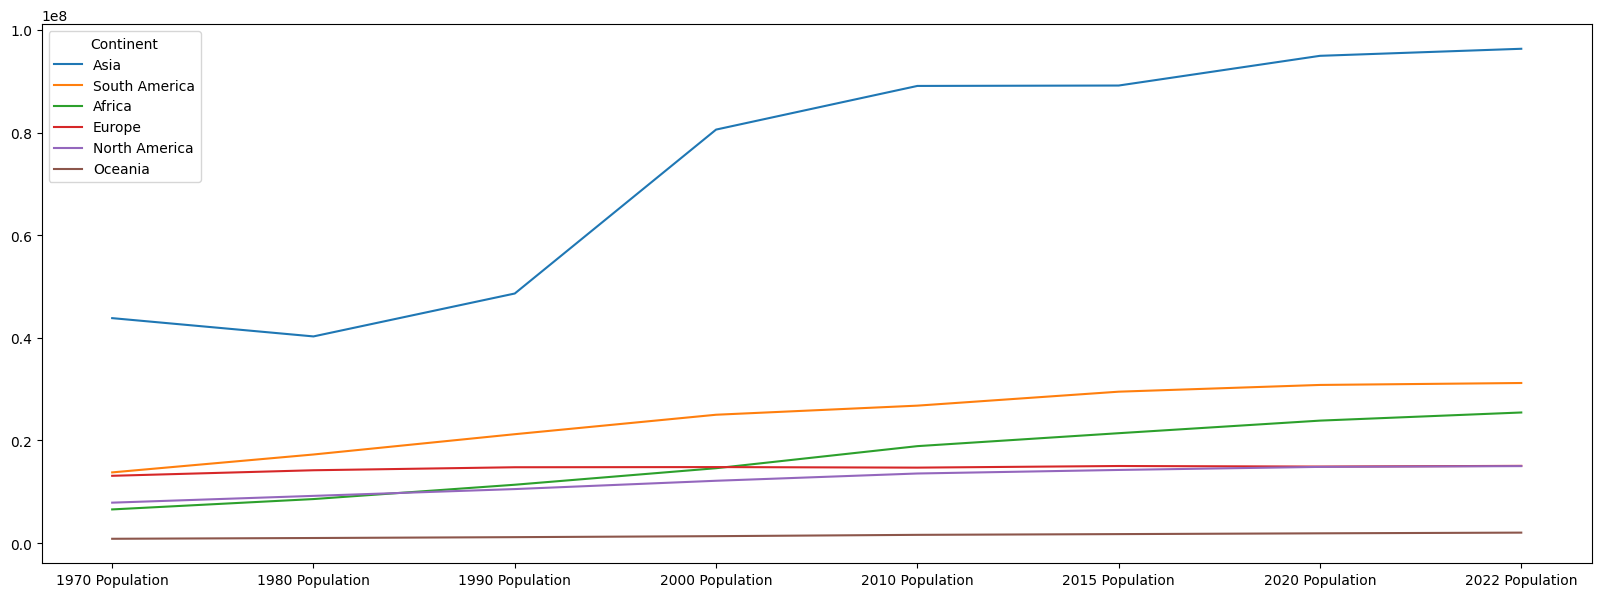

In [ ]:
df3.plot()

<Axes: >

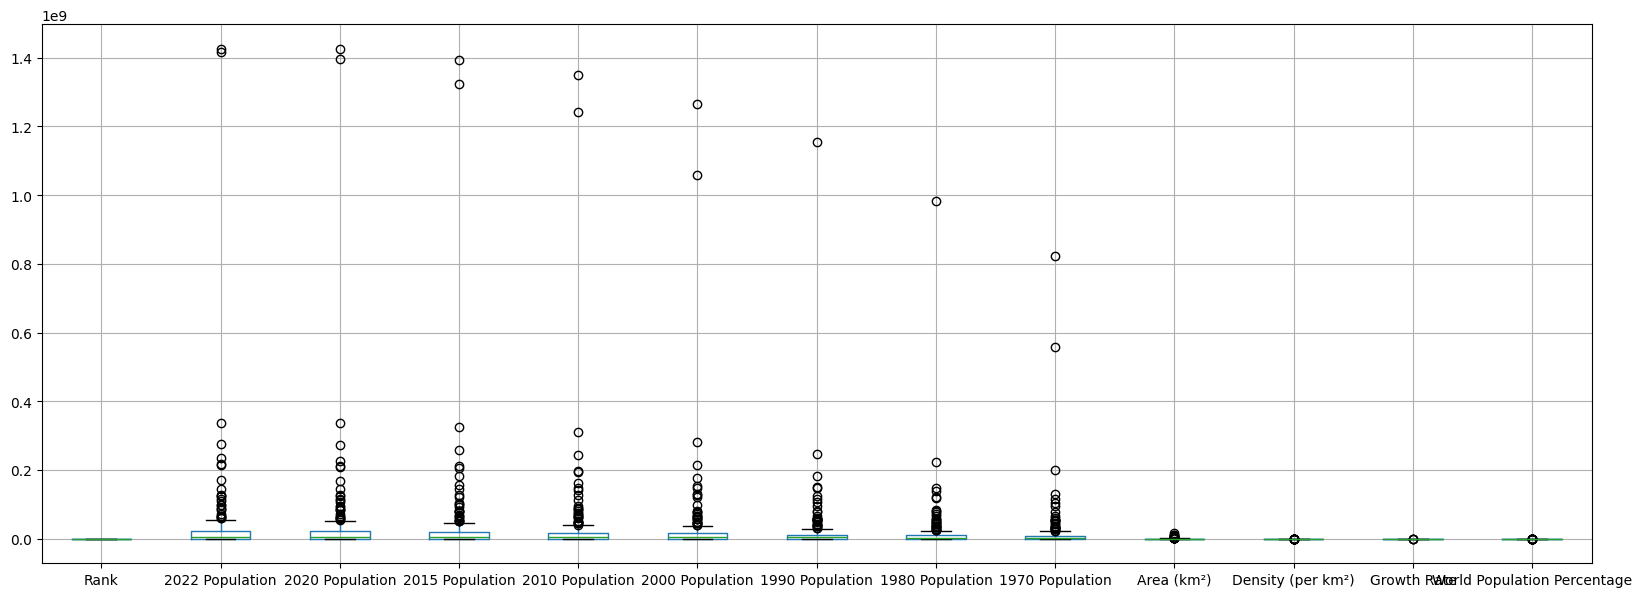

In [ ]:
df.boxplot(figsize=(20,7))

In [ ]:
df.select_dtypes(include='number')

Rank  2022 Population  2020 Population  2015 Population  2010 Population  \
0      36      41128771.00      38972230.00      33753499.00      28189672.00   
1     138       2842321.00       2866849.00       2882481.00       2913399.00   
2      34      44903225.00      43451666.00      39543154.00      35856344.00   
3     213         44273.00         46189.00         51368.00         54849.00   
4     203         79824.00         77700.00         71746.00         71519.00   
..    ...              ...              ...              ...              ...   
229   226         11572.00         11655.00         12182.00         13142.00   
230   172        575986.00        556048.00        491824.00        413296.00   
231    46      33696614.00      32284046.00      28516545.00      24743946.00   
232    63      20017675.00      18927715.00              NaN      13792086.00   
233    74      16320537.00      15669666.00      14154937.00      12839771.00   

     2000 Population  1990 Population  1980 Population  1970 Population  \
0        19542982.00      10694796.00      12486631.00      10752971.00   
1         3182021.00       3295066.00       2941651.00       2324731.00   
2        30774621.00      25518074.00      18739378.00      13795915.00   
3           58230.00         47818.00         32886.00         27075.00   
4           66097.00         53569.00         35611.00         19860.00   
..               ...              ...              ...              ...   
229         14723.00         13454.00         11315.00          9377.00   
230        270375.00        178529.00        116775.00         76371.00   
231      18628700.00      13375121.00       9204938.00       6843607.00   
232       9891136.00       7686401.00       5720438.00       4281671.00   
233      11834676.00      10113893.00       7049926.00       5202918.00   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
0     652230.00              63.06         1.03                         0.52  
1      28748.00              98.87         1.00                         0.04  
2    2381741.00              18.85         1.02                         0.56  
3        199.00             222.48         0.98                         0.00  
4        468.00             170.56         1.01                         0.00  
..          ...                ...          ...                          ...  
229      142.00              81.49         1.00                         0.00  
230   266000.00               2.17         1.02                         0.01  
231   527968.00              63.82         1.02                         0.42  
232   752612.00              26.60         1.03                         0.25  
233   390757.00              41.77         1.02                         0.20  

[234 rows x 13 columns]

# **Automating Crypto with API**

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '68496f88-ad7c-4469-8c37-18a435bb8ff6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-07-27T05:20:58.117Z', 'error_code': 0, 'error_message': None, 'elapsed': 1952, 'credit_count': 1, 'notice': None, 'total_count': 9438}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12267, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [ ]:
type(data)

dict

In [ ]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [ ]:
df

In [ ]:
def api_runner():
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '68496f88-ad7c-4469-8c37-18a435bb8ff6',
  }

  session = Session()
  session.headers.update(headers)

  # try:
  #   response = session.get(url, params=parameters)
  #   data = json.loads(response.text)
  #   print(data)
  # except (ConnectionError, Timeout, TooManyRedirects) as e:
  #   print(e)

  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  global df
  df = pd.concat([df2, df], ignore_index=True)
  if not os.path.isfile(r'API.csv'):
    df.to_csv(r'API.csv', index=False, header='column_names')
  else:
    df.to_csv(r'API.csv', index=False, mode='a', header='column_names')

In [ ]:
import os
from time import time
from time import sleep
# 333 : because of call limit of each day
for i in range(333):
  api_runner()
  print('API Runner completed')
  sleep(60)
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(r'API.csv')
df

id         name  symbol         slug  num_market_pairs  \
0        1      Bitcoin     BTC      bitcoin             12267   
1     1027     Ethereum     ETH     ethereum             10413   
2       52          XRP     XRP          xrp              1661   
3      825  Tether USDt    USDT       tether            138625   
4     1839          BNB     BNB          bnb              2638   
5     5426       Solana     SOL       solana               957   
6     3408         USDC    USDC     usd-coin             29860   
7       74     Dogecoin    DOGE     dogecoin              1262   
8     1958         TRON     TRX         tron              1206   
9     2010      Cardano     ADA      cardano              1554   
10   32196  Hyperliquid    HYPE  hyperliquid               119   
11   20947          Sui     SUI          sui               720   
12     512      Stellar     XLM      stellar               730   
13    1975    Chainlink    LINK    chainlink              2048   
14    4642       Hedera    HBAR       hedera               358   
15       1      Bitcoin     BTC      bitcoin             12267   
16    1027     Ethereum     ETH     ethereum             10413   
17      52          XRP     XRP          xrp              1661   
18     825  Tether USDt    USDT       tether            138625   
19    1839          BNB     BNB          bnb              2638   
20    5426       Solana     SOL       solana               957   
21    3408         USDC    USDC     usd-coin             29860   
22      74     Dogecoin    DOGE     dogecoin              1262   
23    1958         TRON     TRX         tron              1206   
24    2010      Cardano     ADA      cardano              1554   
25   32196  Hyperliquid    HYPE  hyperliquid               119   
26   20947          Sui     SUI          sui               720   
27     512      Stellar     XLM      stellar               730   
28    1975    Chainlink    LINK    chainlink              2048   
29    4642       Hedera    HBAR       hedera               358   
30       1      Bitcoin     BTC      bitcoin             12267   
31    1027     Ethereum     ETH     ethereum             10413   
32      52          XRP     XRP          xrp              1661   
33     825  Tether USDt    USDT       tether            138625   
34    1839          BNB     BNB          bnb              2638   
35    5426       Solana     SOL       solana               957   
36    3408         USDC    USDC     usd-coin             29860   
37      74     Dogecoin    DOGE     dogecoin              1262   
38    1958         TRON     TRX         tron              1206   
39    2010      Cardano     ADA      cardano              1554   
40   32196  Hyperliquid    HYPE  hyperliquid               119   
41   20947          Sui     SUI          sui               720   
42     512      Stellar     XLM      stellar               730   
43    1975    Chainlink    LINK    chainlink              2048   
44    4642       Hedera    HBAR       hedera               358   
45       1      Bitcoin     BTC      bitcoin             12267   
46    1027     Ethereum     ETH     ethereum             10413   
47      52          XRP     XRP          xrp              1661   
48     825  Tether USDt    USDT       tether            138625   
49    1839          BNB     BNB          bnb              2638   
50    5426       Solana     SOL       solana               957   
51    3408         USDC    USDC     usd-coin             29860   
52      74     Dogecoin    DOGE     dogecoin              1262   
53    1958         TRON     TRX         tron              1206   
54    2010      Cardano     ADA      cardano              1554   
55   32196  Hyperliquid    HYPE  hyperliquid               119   
56   20947          Sui     SUI          sui               720   
57     512      Stellar     XLM      stellar               730   
58    1975    Chainlink    LINK    chainlink              2048   
59    4642       Hedera    HBAR       hedera    

In [ ]:
df.describe()

id     name symbol     slug num_market_pairs  \
count   226      226    226      226              226   
unique   16       16     16       16               16   
top       1  Bitcoin    BTC  bitcoin            12267   
freq     15       15     15       15               15   

                      date_added  \
count                        226   
unique                        16   
top     2010-07-13T00:00:00.000Z   
freq                          15   

                                                     tags  max_supply  \
count                                                 226         106   
unique                                                 16           8   
top     ['mineable', 'pow', 'sha-256', 'store-of-value...  21000000.0   
freq                                                   15          15   

       circulating_supply total_supply infinite_supply  platform cmc_rank  \
count                 226          226             226         1      226   
unique                 16           16               3         1       16   
top            19898031.0   19898031.0           False  platform        1   
freq                   15           15             150         1       15   

       self_reported_circulating_supply self_reported_market_cap  tvl_ratio  \
count                                91                       91          1   
unique                                7                        7          1   
top                         525236893.3        98649342243.00342  tvl_ratio   
freq                                 15                       15          1   

                    last_updated     quote.USD.price quote.USD.volume_24h  \
count                        226                 226                  226   
unique                         3                  16                   16   
top     2025-07-27T05:19:00.000Z  118245.62981094643    47565290218.77513   
freq                         150                  15                   15   

       quote.USD.volume_change_24h quote.USD.percent_change_1h  \
count                          226                         226   
unique                          16                          16   
top                       -43.1227                 -0.01040353   
freq                            15                          15   

       quote.USD.percent_change_24h quote.USD.percent_change_7d  \
count                           226                         226   
unique                           16                          16   
top                      0.64945259                  0.27518768   
freq                             15                          15   

       quote.USD.percent_change_30d quote.USD.percent_change_60d  \
count                           226                          226   
unique                           16                           16   
top                     10.00728516                   8.52549171   
freq                             15                           15   

       quote.USD.percent_change_90d quote.USD.market_cap  \
count                           226                  226   
unique                           16                   16   
top                     25.54685211   2352855207592.7363   
freq                             15                   15   

       quote.USD.market_cap_dominance quote.USD.fully_diluted_market_cap  \
count                             226                                226   
unique                             16                                 16   
top                           60.3061                   2483158226029.88   
freq                               15                                 15   

        quote.USD.tvl    quote.USD.last_updated platform.id platform.name  \
count               1                       226          61            61   
unique              1                         3           3             3   
top     quote.USD.tvl  2025-07-27T05:19:00.000Z      1027.0      Ethereum   
freq      

In [ ]:
#removing scientific notation (.e10)
pd.options.display.float_format = '{:,.2f}'.format
# another way
"""
pd.set_option('display.float_format', lambda x: '%.2f' % x)

"""

In [ ]:
df

id         name  symbol         slug  num_market_pairs  \
0        1      Bitcoin     BTC      bitcoin             12267   
1     1027     Ethereum     ETH     ethereum             10413   
2       52          XRP     XRP          xrp              1661   
3      825  Tether USDt    USDT       tether            138625   
4     1839          BNB     BNB          bnb              2638   
5     5426       Solana     SOL       solana               957   
6     3408         USDC    USDC     usd-coin             29860   
7       74     Dogecoin    DOGE     dogecoin              1262   
8     1958         TRON     TRX         tron              1206   
9     2010      Cardano     ADA      cardano              1554   
10   32196  Hyperliquid    HYPE  hyperliquid               119   
11   20947          Sui     SUI          sui               720   
12     512      Stellar     XLM      stellar               730   
13    1975    Chainlink    LINK    chainlink              2048   
14    4642       Hedera    HBAR       hedera               358   
15       1      Bitcoin     BTC      bitcoin             12267   
16    1027     Ethereum     ETH     ethereum             10413   
17      52          XRP     XRP          xrp              1661   
18     825  Tether USDt    USDT       tether            138625   
19    1839          BNB     BNB          bnb              2638   
20    5426       Solana     SOL       solana               957   
21    3408         USDC    USDC     usd-coin             29860   
22      74     Dogecoin    DOGE     dogecoin              1262   
23    1958         TRON     TRX         tron              1206   
24    2010      Cardano     ADA      cardano              1554   
25   32196  Hyperliquid    HYPE  hyperliquid               119   
26   20947          Sui     SUI          sui               720   
27     512      Stellar     XLM      stellar               730   
28    1975    Chainlink    LINK    chainlink              2048   
29    4642       Hedera    HBAR       hedera               358   
30       1      Bitcoin     BTC      bitcoin             12267   
31    1027     Ethereum     ETH     ethereum             10413   
32      52          XRP     XRP          xrp              1661   
33     825  Tether USDt    USDT       tether            138625   
34    1839          BNB     BNB          bnb              2638   
35    5426       Solana     SOL       solana               957   
36    3408         USDC    USDC     usd-coin             29860   
37      74     Dogecoin    DOGE     dogecoin              1262   
38    1958         TRON     TRX         tron              1206   
39    2010      Cardano     ADA      cardano              1554   
40   32196  Hyperliquid    HYPE  hyperliquid               119   
41   20947          Sui     SUI          sui               720   
42     512      Stellar     XLM      stellar               730   
43    1975    Chainlink    LINK    chainlink              2048   
44    4642       Hedera    HBAR       hedera               358   
45       1      Bitcoin     BTC      bitcoin             12267   
46    1027     Ethereum     ETH     ethereum             10413   
47      52          XRP     XRP          xrp              1661   
48     825  Tether USDt    USDT       tether            138625   
49    1839          BNB     BNB          bnb              2638   
50    5426       Solana     SOL       solana               957   
51    3408         USDC    USDC     usd-coin             29860   
52      74     Dogecoin    DOGE     dogecoin              1262   
53    1958         TRON     TRX         tron              1206   
54    2010      Cardano     ADA      cardano              1554   
55   32196  Hyperliquid    HYPE  hyperliquid               119   
56   20947          Sui     SUI          sui               720   
57     512      Stellar     XLM      stellar               730   
58    1975    Chainlink    LINK    chainlink              2048   
59    4642       Hedera    HBAR       hedera    

In [ ]:
df3 = df_cleaned.groupby('name',sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d',	'quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  ...  quote.USD.percent_change_90d
name                                      ...                              
Bitcoin                            -0.01  ...                         25.55
Ethereum                            0.61  ...                        111.92
XRP                                 0.35  ...                         40.93
Tether USDt                        -0.01  ...                         -0.00
BNB                                 0.09  ...                         31.75
Solana                              0.47  ...                         25.80
USDC                               -0.01  ...                         -0.01
Dogecoin                            1.10  ...                         34.76
TRON                               -0.31  ...                         30.43
Cardano                             0.81  ...                         17.13
Hyperliquid                         0.02  ...                        143.75
Sui                                 0.32  ...                         17.47
Stellar                             2.76  ...                         58.47
Chainlink                           1.11  ...                         27.35
Hedera                              3.03  ...                         56.40

[15 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  226 non-null    object
 1   name                                226 non-null    object
 2   symbol                              226 non-null    object
 3   slug                                226 non-null    object
 4   num_market_pairs                    226 non-null    object
 5   date_added                          226 non-null    object
 6   tags                                226 non-null    object
 7   max_supply                          106 non-null    object
 8   circulating_supply                  226 non-null    object
 9   total_supply                        226 non-null    object
 10  infinite_supply                     226 non-null    object
 11  platform                            1 non-null      object

In [ ]:
# Assuming the header row contains non-numeric values in the percentage change columns,
# we can filter out rows where the 'quote.USD.percent_change_1h' column is not numeric.
# This implicitly removes the header rows that were added as data.
df_cleaned = df[pd.to_numeric(df['quote.USD.percent_change_1h'], errors='coerce').notna()]


# df3 = df_cleaned.groupby('name',sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',      'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
# df3

In [ ]:
# Convert from object to float
df_cleaned['quote.USD.percent_change_1h'] = df_cleaned['quote.USD.percent_change_1h'].astype(float)

/tmp/ipython-input-63-4184421976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['quote.USD.percent_change_1h'] = df_cleaned['quote.USD.percent_change_1h'].astype(float)


In [ ]:
df_cleaned['quote.USD.percent_change_24h'] = df_cleaned['quote.USD.percent_change_24h'].astype(float)
df_cleaned['quote.USD.percent_change_7d'] = df_cleaned['quote.USD.percent_change_7d'].astype(float)
df_cleaned['quote.USD.percent_change_30d'] = df_cleaned['quote.USD.percent_change_30d'].astype(float)
df_cleaned['quote.USD.percent_change_60d'] = df_cleaned['quote.USD.percent_change_60d'].astype(float)
df_cleaned['quote.USD.percent_change_90d'] = df_cleaned['quote.USD.percent_change_90d'].astype(float)

/tmp/ipython-input-66-2136747633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['quote.USD.percent_change_24h'] = df_cleaned['quote.USD.percent_change_24h'].astype(float)
/tmp/ipython-input-66-2136747633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['quote.USD.percent_change_7d'] = df_cleaned['quote.USD.percent_change_7d'].astype(float)
/tmp/ipython-input-66-2136747633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 0 to 225
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  225 non-null    object 
 1   name                                225 non-null    object 
 2   symbol                              225 non-null    object 
 3   slug                                225 non-null    object 
 4   num_market_pairs                    225 non-null    object 
 5   date_added                          225 non-null    object 
 6   tags                                225 non-null    object 
 7   max_supply                          105 non-null    object 
 8   circulating_supply                  225 non-null    object 
 9   total_supply                        225 non-null    object 
 10  infinite_supply                     225 non-null    object 
 11  platform                            0 non-null    

In [ ]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.01
             quote.USD.percent_change_24h     0.65
             quote.USD.percent_change_7d      0.28
             quote.USD.percent_change_30d    10.01
             quote.USD.percent_change_60d     8.53
             quote.USD.percent_change_90d    25.55
Ethereum     quote.USD.percent_change_1h      0.61
             quote.USD.percent_change_24h     1.39
             quote.USD.percent_change_7d      4.05
             quote.USD.percent_change_30d    55.54
             quote.USD.percent_change_60d    43.78
             quote.USD.percent_change_90d   111.92
XRP          quote.USD.percent_change_1h      0.35
             quote.USD.percent_change_24h     2.16
             quote.USD.percent_change_7d     -5.83
             quote.USD.percent_change_30d    52.62
             quote.USD.percent_change_60d    39.37
             quote.USD.percent_change_90d    40.93
Tether USDt  quote.USD.percent_change_1h     -0.01
             quote.USD.percent_change_24h     0.01
             quote.USD.percent_change_7d     -0.00
             quote.USD.percent_change_30d    -0.01
             quote.USD.percent_change_60d     0.00
             quote.USD.percent_change_90d    -0.00
BNB          quote.USD.percent_change_1h      0.09
             quote.USD.percent_change_24h     1.87
             quote.USD.percent_change_7d      7.39
             quote.USD.percent_change_30d    23.28
             quote.USD.percent_change_60d    16.60
             quote.USD.percent_change_90d    31.75
Solana       quote.USD.percent_change_1h      0.47
             quote.USD.percent_change_24h     0.87
             quote.USD.percent_change_7d      5.85
             quote.USD.percent_change_30d    32.89
             quote.USD.percent_change_60d     7.39
             quote.USD.percent_change_90d    25.80
USDC         quote.USD.percent_change_1h     -0.01
             quote.USD.percent_change_24h    -0.00
             quote.USD.percent_change_7d      0.01
             quote.USD.percent_change_30d    -0.00
             quote.USD.percent_change_60d     0.02
             quote.USD.percent_change_90d    -0.01
Dogecoin     quote.USD.percent_change_1h      1.10
             quote.USD.percent_change_24h     1.73
             quote.USD.percent_change_7d     -4.46
             quote.USD.percent_change_30d    49.27
             quote.USD.percent_change_60d     7.78
             quote.USD.percent_change_90d    34.76
TRON         quote.USD.percent_change_1h     -0.31
             quote.USD.percent_change_24h     0.87
             quote.USD.percent_change_7d      0.41
             quote.USD.percent_change_30d    18.14
             quote.USD.percent_change_60d    16.01
             quote.USD.percent_change_90d    30.43
Cardano      quote.USD.percent_change_1h      0.81
             quote.USD.percent_change_24h     1.48
             quote.USD.percent_change_7d      0.17
             quote.USD.percent_change_30d    49.59
             quote.USD.percent_change_60d    10.93
             quote.USD.percent_change_90d    17.13
Hyperliquid  quote.USD.percent_change_1h      0.02
             quote.USD.percent_change_24h    -2.33
             quote.USD.percent_change_7d     -2.86
             quote.USD.percent_change_30d    18.79
             quote.USD.percent_change_60d    21.62
             quote.USD.percent_change_90d   143.75
Sui          quote.USD.percent_change_1h      0.32
             quote.USD.percent_change_24h     5.79
             quote.USD.percent_change_7d      8.90
             quote.USD.percent_change_30d    59.63
             quote.USD.percent_change_60d    13.65
             quote.USD.percent_change_90d    17.47
Stellar      quote.USD.percent_change_1h      2.76
             quote.USD.percent_change_24h     2.98
             quote.USD.percent_change_7d     -1.24
             quote.USD.percent_change_30d    93.12
             quote.USD.percent_change_60d    58.24
             quote.USD.percent_

In [ ]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 =df4.to_frame(name='values')
df5

values
name                                            
Bitcoin     quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h    0.65
            quote.USD.percent_change_7d     0.28
            quote.USD.percent_change_30d   10.01
            quote.USD.percent_change_60d    8.53
            quote.USD.percent_change_90d   25.55
Ethereum    quote.USD.percent_change_1h     0.61
            quote.USD.percent_change_24h    1.39
            quote.USD.percent_change_7d     4.05
            quote.USD.percent_change_30d   55.54
            quote.USD.percent_change_60d   43.78
            quote.USD.percent_change_90d  111.92
XRP         quote.USD.percent_change_1h     0.35
            quote.USD.percent_change_24h    2.16
            quote.USD.percent_change_7d    -5.83
            quote.USD.percent_change_30d   52.62
            quote.USD.percent_change_60d   39.37
            quote.USD.percent_change_90d   40.93
Tether USDt quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h    0.01
            quote.USD.percent_change_7d    -0.00
            quote.USD.percent_change_30d   -0.01
            quote.USD.percent_change_60d    0.00
            quote.USD.percent_change_90d   -0.00
BNB         quote.USD.percent_change_1h     0.09
            quote.USD.percent_change_24h    1.87
            quote.USD.percent_change_7d     7.39
            quote.USD.percent_change_30d   23.28
            quote.USD.percent_change_60d   16.60
            quote.USD.percent_change_90d   31.75
Solana      quote.USD.percent_change_1h     0.47
            quote.USD.percent_change_24h    0.87
            quote.USD.percent_change_7d     5.85
            quote.USD.percent_change_30d   32.89
            quote.USD.percent_change_60d    7.39
            quote.USD.percent_change_90d   25.80
USDC        quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h   -0.00
            quote.USD.percent_change_7d     0.01
            quote.USD.percent_change_30d   -0.00
            quote.USD.percent_change_60d    0.02
            quote.USD.percent_change_90d   -0.01
Dogecoin    quote.USD.percent_change_1h     1.10
            quote.USD.percent_change_24h    1.73
            quote.USD.percent_change_7d    -4.46
            quote.USD.percent_change_30d   49.27
            quote.USD.percent_change_60d    7.78
            quote.USD.percent_change_90d   34.76
TRON        quote.USD.percent_change_1h    -0.31
            quote.USD.percent_change_24h    0.87
            quote.USD.percent_change_7d     0.41
            quote.USD.percent_change_30d   18.14
            quote.USD.percent_change_60d   16.01
            quote.USD.percent_change_90d   30.43
Cardano     quote.USD.percent_change_1h     0.81
            quote.USD.percent_change_24h    1.48
            quote.USD.percent_change_7d     0.17
            quote.USD.percent_change_30d   49.59
            quote.USD.percent_change_60d   10.93
            quote.USD.percent_change_90d   17.13
Hyperliquid quote.USD.percent_change_1h     0.02
            quote.USD.percent_change_24h   -2.33
            quote.USD.percent_change_7d    -2.86
            quote.USD.percent_change_30d   18.79
            quote.USD.percent_change_60d   21.62
            quote.USD.percent_change_90d  143.75
Sui         quote.USD.percent_change_1h     0.32
            quote.USD.percent_change_24h    5.79
            quote.USD.percent_change_7d     8.90
            quote.USD.percent_change_30d   59.63
            quote.USD.percent_change_60d   13.65
            quote.USD.percent_change_90d   17.47
Stellar     quote.USD.percent_change_1h     2.76
            quote.USD.percent_change_24h    2.98
            quote.USD.percent_change_7d    -1.24
            quote.USD.percent_change_30d   93.12
            quote.USD.percent_change_60d   58.24
            quote.USD.percent_change_90d   58.47
Chainlink   quote.USD.percent_change_1h     1.11
            quote.USD.percent_change_24h    3.26
            quote.USD.pe

In [ ]:
type(df5)

pandas.core.frame.DataFrame

In [ ]:
df6 = df5.reset_index()
df6

name                       level_1  values
0       Bitcoin   quote.USD.percent_change_1h   -0.01
1       Bitcoin  quote.USD.percent_change_24h    0.65
2       Bitcoin   quote.USD.percent_change_7d    0.28
3       Bitcoin  quote.USD.percent_change_30d   10.01
4       Bitcoin  quote.USD.percent_change_60d    8.53
5       Bitcoin  quote.USD.percent_change_90d   25.55
6      Ethereum   quote.USD.percent_change_1h    0.61
7      Ethereum  quote.USD.percent_change_24h    1.39
8      Ethereum   quote.USD.percent_change_7d    4.05
9      Ethereum  quote.USD.percent_change_30d   55.54
10     Ethereum  quote.USD.percent_change_60d   43.78
11     Ethereum  quote.USD.percent_change_90d  111.92
12          XRP   quote.USD.percent_change_1h    0.35
13          XRP  quote.USD.percent_change_24h    2.16
14          XRP   quote.USD.percent_change_7d   -5.83
15          XRP  quote.USD.percent_change_30d   52.62
16          XRP  quote.USD.percent_change_60d   39.37
17          XRP  quote.USD.percent_change_90d   40.93
18  Tether USDt   quote.USD.percent_change_1h   -0.01
19  Tether USDt  quote.USD.percent_change_24h    0.01
20  Tether USDt   quote.USD.percent_change_7d   -0.00
21  Tether USDt  quote.USD.percent_change_30d   -0.01
22  Tether USDt  quote.USD.percent_change_60d    0.00
23  Tether USDt  quote.USD.percent_change_90d   -0.00
24          BNB   quote.USD.percent_change_1h    0.09
25          BNB  quote.USD.percent_change_24h    1.87
26          BNB   quote.USD.percent_change_7d    7.39
27          BNB  quote.USD.percent_change_30d   23.28
28          BNB  quote.USD.percent_change_60d   16.60
29          BNB  quote.USD.percent_change_90d   31.75
30       Solana   quote.USD.percent_change_1h    0.47
31       Solana  quote.USD.percent_change_24h    0.87
32       Solana   quote.USD.percent_change_7d    5.85
33       Solana  quote.USD.percent_change_30d   32.89
34       Solana  quote.USD.percent_change_60d    7.39
35       Solana  quote.USD.percent_change_90d   25.80
36         USDC   quote.USD.percent_change_1h   -0.01
37         USDC  quote.USD.percent_change_24h   -0.00
38         USDC   quote.USD.percent_change_7d    0.01
39         USDC  quote.USD.percent_change_30d   -0.00
40         USDC  quote.USD.percent_change_60d    0.02
41         USDC  quote.USD.percent_change_90d   -0.01
42     Dogecoin   quote.USD.percent_change_1h    1.10
43     Dogecoin  quote.USD.percent_change_24h    1.73
44     Dogecoin   quote.USD.percent_change_7d   -4.46
45     Dogecoin  quote.USD.percent_change_30d   49.27
46     Dogecoin  quote.USD.percent_change_60d    7.78
47     Dogecoin  quote.USD.percent_change_90d   34.76
48         TRON   quote.USD.percent_change_1h   -0.31
49         TRON  quote.USD.percent_change_24h    0.87
50         TRON   quote.USD.percent_change_7d    0.41
51         TRON  quote.USD.percent_change_30d   18.14
52         TRON  quote.USD.percent_change_60d   16.01
53         TRON  quote.USD.percent_change_90d   30.43
54      Cardano   quote.USD.percent_change_1h    0.81
55      Cardano  quote.USD.percent_change_24h    1.48
56      Cardano   quote.USD.percent_change_7d    0.17
57      Cardano  quote.USD.percent_change_30d   49.59
58      Cardano  quote.USD.percent_change_60d   10.93
59      Cardano  quote.USD.percent_change_90d   17.13
60  Hyperliquid   quote.USD.percent_change_1h    0.02
61  Hyperliquid  quote.USD.percent_change_24h   -2.33
62  Hyperliquid   quote.USD.percent_change_7d   -2.86
63  Hyperliquid  quote.USD.percent_change_30d   18.79
64  Hyperliquid  quote.USD.percent_change_60d   21.62
65  Hyperliquid  quote.USD.percent_change_90d  143.75
66          Sui   quote.USD.percent_change_1h    0.32
67          Sui  quote.USD.percent_change_24h    5.79
68          Sui   quote.USD.percent_change_7d    8.90
69          Sui  quote.USD.percent_change_30d   59.63
70          Sui  quote.USD.percent_change_60d   13.65
71          Sui  quote.USD.percent_change_90d   17.47
72      Stellar   quote.USD.percent_change_1h    2.76
73      Stellar

In [ ]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

name                percent_change  values
0       Bitcoin   quote.USD.percent_change_1h   -0.01
1       Bitcoin  quote.USD.percent_change_24h    0.65
2       Bitcoin   quote.USD.percent_change_7d    0.28
3       Bitcoin  quote.USD.percent_change_30d   10.01
4       Bitcoin  quote.USD.percent_change_60d    8.53
5       Bitcoin  quote.USD.percent_change_90d   25.55
6      Ethereum   quote.USD.percent_change_1h    0.61
7      Ethereum  quote.USD.percent_change_24h    1.39
8      Ethereum   quote.USD.percent_change_7d    4.05
9      Ethereum  quote.USD.percent_change_30d   55.54
10     Ethereum  quote.USD.percent_change_60d   43.78
11     Ethereum  quote.USD.percent_change_90d  111.92
12          XRP   quote.USD.percent_change_1h    0.35
13          XRP  quote.USD.percent_change_24h    2.16
14          XRP   quote.USD.percent_change_7d   -5.83
15          XRP  quote.USD.percent_change_30d   52.62
16          XRP  quote.USD.percent_change_60d   39.37
17          XRP  quote.USD.percent_change_90d   40.93
18  Tether USDt   quote.USD.percent_change_1h   -0.01
19  Tether USDt  quote.USD.percent_change_24h    0.01
20  Tether USDt   quote.USD.percent_change_7d   -0.00
21  Tether USDt  quote.USD.percent_change_30d   -0.01
22  Tether USDt  quote.USD.percent_change_60d    0.00
23  Tether USDt  quote.USD.percent_change_90d   -0.00
24          BNB   quote.USD.percent_change_1h    0.09
25          BNB  quote.USD.percent_change_24h    1.87
26          BNB   quote.USD.percent_change_7d    7.39
27          BNB  quote.USD.percent_change_30d   23.28
28          BNB  quote.USD.percent_change_60d   16.60
29          BNB  quote.USD.percent_change_90d   31.75
30       Solana   quote.USD.percent_change_1h    0.47
31       Solana  quote.USD.percent_change_24h    0.87
32       Solana   quote.USD.percent_change_7d    5.85
33       Solana  quote.USD.percent_change_30d   32.89
34       Solana  quote.USD.percent_change_60d    7.39
35       Solana  quote.USD.percent_change_90d   25.80
36         USDC   quote.USD.percent_change_1h   -0.01
37         USDC  quote.USD.percent_change_24h   -0.00
38         USDC   quote.USD.percent_change_7d    0.01
39         USDC  quote.USD.percent_change_30d   -0.00
40         USDC  quote.USD.percent_change_60d    0.02
41         USDC  quote.USD.percent_change_90d   -0.01
42     Dogecoin   quote.USD.percent_change_1h    1.10
43     Dogecoin  quote.USD.percent_change_24h    1.73
44     Dogecoin   quote.USD.percent_change_7d   -4.46
45     Dogecoin  quote.USD.percent_change_30d   49.27
46     Dogecoin  quote.USD.percent_change_60d    7.78
47     Dogecoin  quote.USD.percent_change_90d   34.76
48         TRON   quote.USD.percent_change_1h   -0.31
49         TRON  quote.USD.percent_change_24h    0.87
50         TRON   quote.USD.percent_change_7d    0.41
51         TRON  quote.USD.percent_change_30d   18.14
52         TRON  quote.USD.percent_change_60d   16.01
53         TRON  quote.USD.percent_change_90d   30.43
54      Cardano   quote.USD.percent_change_1h    0.81
55      Cardano  quote.USD.percent_change_24h    1.48
56      Cardano   quote.USD.percent_change_7d    0.17
57      Cardano  quote.USD.percent_change_30d   49.59
58      Cardano  quote.USD.percent_change_60d   10.93
59      Cardano  quote.USD.percent_change_90d   17.13
60  Hyperliquid   quote.USD.percent_change_1h    0.02
61  Hyperliquid  quote.USD.percent_change_24h   -2.33
62  Hyperliquid   quote.USD.percent_change_7d   -2.86
63  Hyperliquid  quote.USD.percent_change_30d   18.79
64  Hyperliquid  quote.USD.percent_change_60d   21.62
65  Hyperliquid  quote.USD.percent_change_90d  143.75
66          Sui   quote.USD.percent_change_1h    0.32
67          Sui  quote.USD.percent_change_24h    5.79
68          Sui   quote.USD.percent_change_7d    8.90
69          Sui  quote.USD.percent_change_30d   59.63
70          Sui  quote.USD.percent_change_60d   13.65
71          Sui  quote.USD.percent_change_90d   17.47
72      Stellar   quote.USD.percent_change_1h    2.76
73      Stellar

In [ ]:
df7['percent_change'] = df7['percent_change'].replace(
    ['quote.USD.percent_change_1h',
     'quote.USD.percent_change_24h',
     'quote.USD.percent_change_7d',
     'quote.USD.percent_change_30d',
     'quote.USD.percent_change_60d',
     'quote.USD.percent_change_90d'],
      ['1h','24h','7d','30d','60d','90d'])
df7


name percent_change  values
0       Bitcoin             1h   -0.01
1       Bitcoin            24h    0.65
2       Bitcoin             7d    0.28
3       Bitcoin            30d   10.01
4       Bitcoin            60d    8.53
5       Bitcoin            90d   25.55
6      Ethereum             1h    0.61
7      Ethereum            24h    1.39
8      Ethereum             7d    4.05
9      Ethereum            30d   55.54
10     Ethereum            60d   43.78
11     Ethereum            90d  111.92
12          XRP             1h    0.35
13          XRP            24h    2.16
14          XRP             7d   -5.83
15          XRP            30d   52.62
16          XRP            60d   39.37
17          XRP            90d   40.93
18  Tether USDt             1h   -0.01
19  Tether USDt            24h    0.01
20  Tether USDt             7d   -0.00
21  Tether USDt            30d   -0.01
22  Tether USDt            60d    0.00
23  Tether USDt            90d   -0.00
24          BNB             1h    0.09
25          BNB            24h    1.87
26          BNB             7d    7.39
27          BNB            30d   23.28
28          BNB            60d   16.60
29          BNB            90d   31.75
30       Solana             1h    0.47
31       Solana            24h    0.87
32       Solana             7d    5.85
33       Solana            30d   32.89
34       Solana            60d    7.39
35       Solana            90d   25.80
36         USDC             1h   -0.01
37         USDC            24h   -0.00
38         USDC             7d    0.01
39         USDC            30d   -0.00
40         USDC            60d    0.02
41         USDC            90d   -0.01
42     Dogecoin             1h    1.10
43     Dogecoin            24h    1.73
44     Dogecoin             7d   -4.46
45     Dogecoin            30d   49.27
46     Dogecoin            60d    7.78
47     Dogecoin            90d   34.76
48         TRON             1h   -0.31
49         TRON            24h    0.87
50         TRON             7d    0.41
51         TRON            30d   18.14
52         TRON            60d   16.01
53         TRON            90d   30.43
54      Cardano             1h    0.81
55      Cardano            24h    1.48
56      Cardano             7d    0.17
57      Cardano            30d   49.59
58      Cardano            60d   10.93
59      Cardano            90d   17.13
60  Hyperliquid             1h    0.02
61  Hyperliquid            24h   -2.33
62  Hyperliquid             7d   -2.86
63  Hyperliquid            30d   18.79
64  Hyperliquid            60d   21.62
65  Hyperliquid            90d  143.75
66          Sui             1h    0.32
67          Sui            24h    5.79
68          Sui             7d    8.90
69          Sui            30d   59.63
70          Sui            60d   13.65
71          Sui            90d   17.47
72      Stellar             1h    2.76
73      Stellar            24h    2.98
74      Stellar             7d   -1.24
75      Stellar            30d   93.12
76      Stellar            60d   58.24
77      Stellar            90d   58.47
78    Chainlink             1h    1.11
79    Chainlink            24h    3.26
80    Chainlink             7d    1.36
81    Chainlink            30d   43.56
82    Chainlink            60d   18.68
83    Chainlink            90d   27.35
84       Hedera             1h    3.03
85       Hedera            24h   12.86
86       Hedera             7d   12.63
87       Hedera            30d  110.21
88       Hedera            60d   61.16
89       Hedera            90d   56.40

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

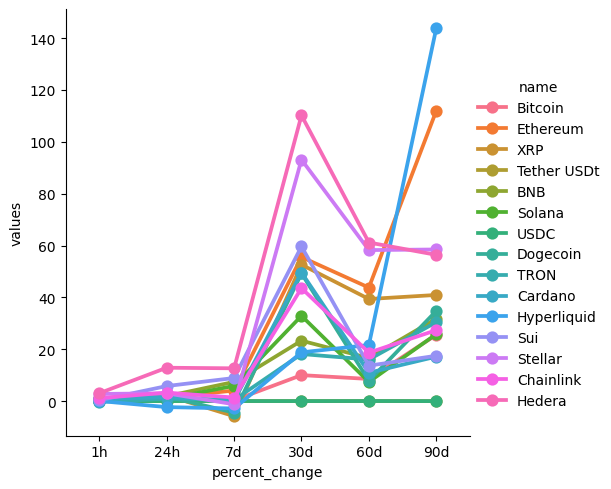

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name     quote.USD.price                   timestamp
0    Bitcoin  118245.62981094643  2025-07-27 05:58:34.603061
15   Bitcoin  118245.62981094643  2025-07-27 05:41:59.570349
30   Bitcoin  118245.62981094643  2025-07-27 05:40:59.565672
45   Bitcoin  118245.62981094643  2025-07-27 05:39:59.561275
60   Bitcoin  118245.62981094643  2025-07-27 05:38:59.555597
75   Bitcoin  118245.62981094643  2025-07-27 05:37:59.550000
90   Bitcoin  118245.62981094643  2025-07-27 05:25:06.301999
106  Bitcoin  118245.62981094643  2025-07-27 05:59:34.620087
121  Bitcoin  118245.62981094643  2025-07-27 05:58:34.603061
136  Bitcoin  118245.62981094643  2025-07-27 05:41:59.570349
151  Bitcoin  118245.62981094643  2025-07-27 05:40:59.565672
166  Bitcoin  118245.62981094643  2025-07-27 05:39:59.561275
181  Bitcoin  118245.62981094643  2025-07-27 05:38:59.555597
196  Bitcoin  118245.62981094643  2025-07-27 05:37:59.550000
211  Bitcoin  118245.62981094643  2025-07-27 05:25:06.301999

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

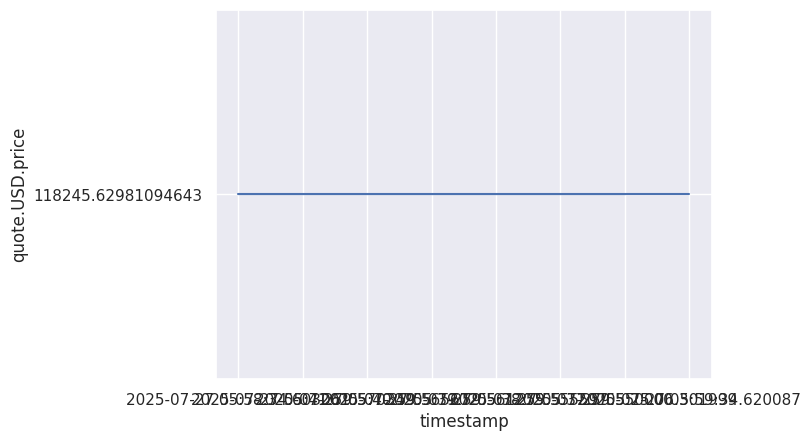

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)